In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import TruncatedNormal
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

In [3]:
n = len(mnist.data)
N = 20000
indices = np.random.permutation(range(n))[:N]
X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

x_max = X.max().astype(np.float32)
print('max: {}'.format(x_max))
# 正規化するために最大値255で割る（0〜1の範囲となる)
X = X / x_max
# 平均を0とする
X = X - X.mean(axis=1).reshape(len(X), 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, train_size=0.6)
print(len(X_train), len(Y_train))
print(len(X_validation), len(Y_validation))
print(len(X_test), len(Y_test))

max: 255.0
9600 9600
6400 6400
4000 4000


In [4]:
def weight_variable(shape):
    return np.random.normal(scale=0.1, size=shape)

In [5]:
n_in = len(X[0]) # 784
n_hidden = [200, 200, 200]
n_out = len(Y[0]) # 10
dropout_rate = 0.5
model = Sequential()

for i, h in enumerate(n_hidden):
    if i == 0:
        # model.add(Dense(h, input_dim=n_in, kernel_initializer=weight_variable))
        model.add(Dense(h, input_dim=n_in, kernel_initializer='he_normal'))
    else:
        model.add(Dense(h, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

In [6]:
epochs = 200
batch_size = 100

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
hist = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                 validation_data=(X_validation, Y_validation),
                callbacks=[early_stopping])

Train on 9600 samples, validate on 6400 samples
Epoch 1/200


 100/9600 [..............................] - ETA: 100s - loss: 3.1658 - acc: 0.0800

 400/9600 [>.............................] - ETA: 25s - loss: 3.0232 - acc: 0.0975 

 900/9600 [=>............................] - ETA: 11s - loss: 2.7791 - acc: 0.1322

1400/9600 [===>..........................] - ETA: 7s - loss: 2.6345 - acc: 0.1657 

1900/9600 [====>.........................] - ETA: 5s - loss: 2.5231 - acc: 0.1900

2400/9600 [======>.......................] - ETA: 4s - loss: 2.4093 - acc: 0.2204

2900/9600 [========>.....................] - ETA: 3s - loss: 2.3162 - acc: 0.2431

3400/9600 [=========>....................] - ETA: 2s - loss: 2.2258 - acc: 0.2691

3800/9600 [==========>...................] - ETA: 2s - loss: 2.1666 - acc: 0.2908

4300/9600 [============>.................] - ETA: 1s - loss: 2.0829 - acc: 0.3144

4800/9600 [==============>...............] - ETA: 1s - loss: 2.0117 - acc: 0.3367

5300/9600 [===============>..............] - ETA: 1s - loss: 1.9495 - acc: 0.3557

5800/9600 [=================>............] - ETA: 1s - loss: 1.8937 - acc: 0.3740

6300/9600 [==================>...........] - ETA: 0s - loss: 1.8496 - acc: 0.3870

6800/9600 [====================>.........] - ETA: 0s - loss: 1.7977 - acc: 0.4053

7300/9600 [=====================>........] - ETA: 0s - loss: 1.7450 - acc: 0.4233

7800/9600 [=======================>......] - ETA: 0s - loss: 1.7047 - acc: 0.4376

8300/9600 [========================>.....] - ETA: 0s - loss: 1.6580 - acc: 0.4545

8800/9600 [==========================>...] - ETA: 0s - loss: 1.6168 - acc: 0.4681

9300/9600 [============================>.] - ETA: 0s - loss: 1.5783 - acc: 0.4819

9600/9600 [==============================] - 2s - loss: 1.5613 - acc: 0.4876 - val_loss: 0.7026 - val_acc: 0.8292


Epoch 2/200
 100/9600 [..............................] - ETA: 1s - loss: 0.7596 - acc: 0.7400

 600/9600 [>.............................] - ETA: 1s - loss: 0.8783 - acc: 0.7150

1100/9600 [==>...........................] - ETA: 0s - loss: 0.8830 - acc: 0.7127

1600/9600 [====>.........................] - ETA: 0s - loss: 0.8932 - acc: 0.7094

2100/9600 [=====>........................] - ETA: 0s - loss: 0.8570 - acc: 0.7233

2600/9600 [=======>......................] - ETA: 0s - loss: 0.8470 - acc: 0.7277

2900/9600 [========>.....................] - ETA: 0s - loss: 0.8437 - acc: 0.7310

3300/9600 [=========>....................] - ETA: 0s - loss: 0.8373 - acc: 0.7303

3700/9600 [==========>...................] - ETA: 0s - loss: 0.8216 - acc: 0.7359

4200/9600 [============>.................] - ETA: 0s - loss: 0.8142 - acc: 0.7407

4700/9600 [=============>................] - ETA: 0s - loss: 0.8011 - acc: 0.7426

5200/9600 [===============>..............] - ETA: 0s - loss: 0.7900 - acc: 0.7458

5700/9600 [================>.............] - ETA: 0s - loss: 0.7856 - acc: 0.7481

6200/9600 [==================>...........] - ETA: 0s - loss: 0.7741 - acc: 0.7526

6700/9600 [===================>..........] - ETA: 0s - loss: 0.7622 - acc: 0.7578

7200/9600 [=====================>........] - ETA: 0s - loss: 0.7569 - acc: 0.7590

7700/9600 [=======================>......] - ETA: 0s - loss: 0.7531 - acc: 0.7604

8200/9600 [========================>.....] - ETA: 0s - loss: 0.7436 - acc: 0.7646

8700/9600 [==========================>...] - ETA: 0s - loss: 0.7419 - acc: 0.7651

9200/9600 [===========================>..] - ETA: 0s - loss: 0.7410 - acc: 0.7662

9600/9600 [==============================] - 1s - loss: 0.7342 - acc: 0.7686 - val_loss: 0.3843 - val_acc: 0.8875


Epoch 3/200
 100/9600 [..............................] - ETA: 1s - loss: 0.4793 - acc: 0.8500

 500/9600 [>.............................] - ETA: 1s - loss: 0.5448 - acc: 0.8280

1000/9600 [==>...........................] - ETA: 1s - loss: 0.5542 - acc: 0.8310

1500/9600 [===>..........................] - ETA: 0s - loss: 0.5562 - acc: 0.8280

2000/9600 [=====>........................] - ETA: 0s - loss: 0.5713 - acc: 0.8235

2500/9600 [======>.......................] - ETA: 0s - loss: 0.5952 - acc: 0.8152

3000/9600 [========>.....................] - ETA: 0s - loss: 0.5828 - acc: 0.8177

3500/9600 [=========>....................] - ETA: 0s - loss: 0.5922 - acc: 0.8174

4000/9600 [===========>..................] - ETA: 0s - loss: 0.5961 - acc: 0.8170

4500/9600 [=============>................] - ETA: 0s - loss: 0.5923 - acc: 0.8184

5000/9600 [==============>...............] - ETA: 0s - loss: 0.5859 - acc: 0.8210

5500/9600 [================>.............] - ETA: 0s - loss: 0.5884 - acc: 0.8204

5900/9600 [=================>............] - ETA: 0s - loss: 0.5840 - acc: 0.8215

6300/9600 [==================>...........] - ETA: 0s - loss: 0.5784 - acc: 0.8224

6700/9600 [===================>..........] - ETA: 0s - loss: 0.5811 - acc: 0.8218

7000/9600 [====================>.........] - ETA: 0s - loss: 0.5795 - acc: 0.8217

7400/9600 [======================>.......] - ETA: 0s - loss: 0.5738 - acc: 0.8234

7900/9600 [=======================>......] - ETA: 0s - loss: 0.5743 - acc: 0.8230

8400/9600 [=========================>....] - ETA: 0s - loss: 0.5702 - acc: 0.8246

8900/9600 [==========================>...] - ETA: 0s - loss: 0.5663 - acc: 0.8257

9400/9600 [============================>.] - ETA: 0s - loss: 0.5628 - acc: 0.8261

9600/9600 [==============================] - 1s - loss: 0.5622 - acc: 0.8262 - val_loss: 0.3123 - val_acc: 0.9086


Epoch 4/200
 100/9600 [..............................] - ETA: 1s - loss: 0.3603 - acc: 0.9300

 400/9600 [>.............................] - ETA: 1s - loss: 0.4363 - acc: 0.8525

 800/9600 [=>............................] - ETA: 1s - loss: 0.5065 - acc: 0.8387

1300/9600 [===>..........................] - ETA: 1s - loss: 0.4944 - acc: 0.8477

1800/9600 [====>.........................] - ETA: 1s - loss: 0.4715 - acc: 0.8522

2300/9600 [======>.......................] - ETA: 0s - loss: 0.4726 - acc: 0.8526

2800/9600 [=======>......................] - ETA: 0s - loss: 0.4889 - acc: 0.8486

3300/9600 [=========>....................] - ETA: 0s - loss: 0.4948 - acc: 0.8476

3800/9600 [==========>...................] - ETA: 0s - loss: 0.4928 - acc: 0.8476

4300/9600 [============>.................] - ETA: 0s - loss: 0.4918 - acc: 0.8467

4800/9600 [==============>...............] - ETA: 0s - loss: 0.4931 - acc: 0.8456

5300/9600 [===============>..............] - ETA: 0s - loss: 0.4910 - acc: 0.8464

5700/9600 [================>.............] - ETA: 0s - loss: 0.4895 - acc: 0.8479

6100/9600 [==================>...........] - ETA: 0s - loss: 0.4929 - acc: 0.8479

6600/9600 [===================>..........] - ETA: 0s - loss: 0.4920 - acc: 0.8483

7000/9600 [====================>.........] - ETA: 0s - loss: 0.4921 - acc: 0.8481

7400/9600 [======================>.......] - ETA: 0s - loss: 0.4925 - acc: 0.8481

7800/9600 [=======================>......] - ETA: 0s - loss: 0.4918 - acc: 0.8482

8200/9600 [========================>.....] - ETA: 0s - loss: 0.4978 - acc: 0.8463

8700/9600 [==========================>...] - ETA: 0s - loss: 0.4939 - acc: 0.8469

9200/9600 [===========================>..] - ETA: 0s - loss: 0.4955 - acc: 0.8464

9600/9600 [==============================] - 1s - loss: 0.4939 - acc: 0.8480 - val_loss: 0.2712 - val_acc: 0.9150


Epoch 5/200
 100/9600 [..............................] - ETA: 1s - loss: 0.5008 - acc: 0.8800

 400/9600 [>.............................] - ETA: 1s - loss: 0.4695 - acc: 0.8575

 800/9600 [=>............................] - ETA: 1s - loss: 0.4638 - acc: 0.8513

1300/9600 [===>..........................] - ETA: 1s - loss: 0.4372 - acc: 0.8638

1800/9600 [====>.........................] - ETA: 0s - loss: 0.4219 - acc: 0.8711

2300/9600 [======>.......................] - ETA: 0s - loss: 0.4169 - acc: 0.8722

2800/9600 [=======>......................] - ETA: 0s - loss: 0.4264 - acc: 0.8711

3300/9600 [=========>....................] - ETA: 0s - loss: 0.4367 - acc: 0.8682

3800/9600 [==========>...................] - ETA: 0s - loss: 0.4414 - acc: 0.8679

4300/9600 [============>.................] - ETA: 0s - loss: 0.4346 - acc: 0.8695

4800/9600 [==============>...............] - ETA: 0s - loss: 0.4291 - acc: 0.8696

5300/9600 [===============>..............] - ETA: 0s - loss: 0.4208 - acc: 0.8723

5800/9600 [=================>............] - ETA: 0s - loss: 0.4198 - acc: 0.8728

6300/9600 [==================>...........] - ETA: 0s - loss: 0.4226 - acc: 0.8716

6800/9600 [====================>.........] - ETA: 0s - loss: 0.4219 - acc: 0.8722

7300/9600 [=====================>........] - ETA: 0s - loss: 0.4240 - acc: 0.8722

7800/9600 [=======================>......] - ETA: 0s - loss: 0.4279 - acc: 0.8714

8300/9600 [========================>.....] - ETA: 0s - loss: 0.4289 - acc: 0.8710

8800/9600 [==========================>...] - ETA: 0s - loss: 0.4294 - acc: 0.8707

9300/9600 [============================>.] - ETA: 0s - loss: 0.4301 - acc: 0.8712

9600/9600 [==============================] - 1s - loss: 0.4291 - acc: 0.8715 - val_loss: 0.2435 - val_acc: 0.9252


Epoch 6/200
 100/9600 [..............................] - ETA: 1s - loss: 0.3775 - acc: 0.8800

 400/9600 [>.............................] - ETA: 1s - loss: 0.3875 - acc: 0.8875

 800/9600 [=>............................] - ETA: 1s - loss: 0.4077 - acc: 0.8762

1200/9600 [==>...........................] - ETA: 1s - loss: 0.3955 - acc: 0.8850

1700/9600 [====>.........................] - ETA: 1s - loss: 0.4018 - acc: 0.8776

2200/9600 [=====>........................] - ETA: 0s - loss: 0.4065 - acc: 0.8791

2700/9600 [=======>......................] - ETA: 0s - loss: 0.4056 - acc: 0.8756

3200/9600 [=========>....................] - ETA: 0s - loss: 0.4201 - acc: 0.8719

3700/9600 [==========>...................] - ETA: 0s - loss: 0.4234 - acc: 0.8703

4200/9600 [============>.................] - ETA: 0s - loss: 0.4156 - acc: 0.8743

4700/9600 [=============>................] - ETA: 0s - loss: 0.4113 - acc: 0.8766

5200/9600 [===============>..............] - ETA: 0s - loss: 0.4122 - acc: 0.8769

5400/9600 [===============>..............] - ETA: 0s - loss: 0.4121 - acc: 0.8763

5700/9600 [================>.............] - ETA: 0s - loss: 0.4125 - acc: 0.8756

6000/9600 [=================>............] - ETA: 0s - loss: 0.4097 - acc: 0.8755

6300/9600 [==================>...........] - ETA: 0s - loss: 0.4054 - acc: 0.8765

6700/9600 [===================>..........] - ETA: 0s - loss: 0.4069 - acc: 0.8763

7000/9600 [====================>.........] - ETA: 0s - loss: 0.4079 - acc: 0.8764

7300/9600 [=====================>........] - ETA: 0s - loss: 0.4082 - acc: 0.8766

7600/9600 [======================>.......] - ETA: 0s - loss: 0.4117 - acc: 0.8754

7900/9600 [=======================>......] - ETA: 0s - loss: 0.4082 - acc: 0.8766

8200/9600 [========================>.....] - ETA: 0s - loss: 0.4097 - acc: 0.8765

8500/9600 [=========================>....] - ETA: 0s - loss: 0.4066 - acc: 0.8779

8800/9600 [==========================>...] - ETA: 0s - loss: 0.4063 - acc: 0.8784

9100/9600 [===========================>..] - ETA: 0s - loss: 0.4064 - acc: 0.8785

9400/9600 [============================>.] - ETA: 0s - loss: 0.4082 - acc: 0.8784

9600/9600 [==============================] - 1s - loss: 0.4089 - acc: 0.8781 - val_loss: 0.2274 - val_acc: 0.9319


Epoch 7/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2901 - acc: 0.9100

 500/9600 [>.............................] - ETA: 1s - loss: 0.3867 - acc: 0.8860

1000/9600 [==>...........................] - ETA: 1s - loss: 0.3580 - acc: 0.8940

1500/9600 [===>..........................] - ETA: 0s - loss: 0.3556 - acc: 0.8900

2000/9600 [=====>........................] - ETA: 0s - loss: 0.3407 - acc: 0.8975

2500/9600 [======>.......................] - ETA: 0s - loss: 0.3535 - acc: 0.8952

3000/9600 [========>.....................] - ETA: 0s - loss: 0.3401 - acc: 0.8990

3500/9600 [=========>....................] - ETA: 0s - loss: 0.3412 - acc: 0.8994

4000/9600 [===========>..................] - ETA: 0s - loss: 0.3419 - acc: 0.9000

4500/9600 [=============>................] - ETA: 0s - loss: 0.3405 - acc: 0.8991

5000/9600 [==============>...............] - ETA: 0s - loss: 0.3423 - acc: 0.8986

5500/9600 [================>.............] - ETA: 0s - loss: 0.3422 - acc: 0.8975

5900/9600 [=================>............] - ETA: 0s - loss: 0.3432 - acc: 0.8973

6300/9600 [==================>...........] - ETA: 0s - loss: 0.3485 - acc: 0.8944

6700/9600 [===================>..........] - ETA: 0s - loss: 0.3459 - acc: 0.8954

7000/9600 [====================>.........] - ETA: 0s - loss: 0.3482 - acc: 0.8946

7400/9600 [======================>.......] - ETA: 0s - loss: 0.3532 - acc: 0.8930

7800/9600 [=======================>......] - ETA: 0s - loss: 0.3565 - acc: 0.8922

8200/9600 [========================>.....] - ETA: 0s - loss: 0.3568 - acc: 0.8926

8600/9600 [=========================>....] - ETA: 0s - loss: 0.3579 - acc: 0.8920

9000/9600 [===========================>..] - ETA: 0s - loss: 0.3551 - acc: 0.8927

9500/9600 [============================>.] - ETA: 0s - loss: 0.3583 - acc: 0.8916

9600/9600 [==============================] - 1s - loss: 0.3574 - acc: 0.8919 - val_loss: 0.2147 - val_acc: 0.9323


Epoch 8/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2479 - acc: 0.9200

 400/9600 [>.............................] - ETA: 1s - loss: 0.3119 - acc: 0.8925

 900/9600 [=>............................] - ETA: 1s - loss: 0.3446 - acc: 0.8878

1300/9600 [===>..........................] - ETA: 1s - loss: 0.3445 - acc: 0.8931

1700/9600 [====>.........................] - ETA: 1s - loss: 0.3417 - acc: 0.8918

2100/9600 [=====>........................] - ETA: 1s - loss: 0.3257 - acc: 0.8981

2600/9600 [=======>......................] - ETA: 0s - loss: 0.3151 - acc: 0.9023

3100/9600 [========>.....................] - ETA: 0s - loss: 0.3154 - acc: 0.9029

3600/9600 [==========>...................] - ETA: 0s - loss: 0.3210 - acc: 0.9006

4100/9600 [===========>..................] - ETA: 0s - loss: 0.3151 - acc: 0.9027

4600/9600 [=============>................] - ETA: 0s - loss: 0.3187 - acc: 0.9020

5100/9600 [==============>...............] - ETA: 0s - loss: 0.3224 - acc: 0.9010

5600/9600 [================>.............] - ETA: 0s - loss: 0.3200 - acc: 0.9014

6100/9600 [==================>...........] - ETA: 0s - loss: 0.3260 - acc: 0.8987

6600/9600 [===================>..........] - ETA: 0s - loss: 0.3284 - acc: 0.8986

7100/9600 [=====================>........] - ETA: 0s - loss: 0.3278 - acc: 0.8983

7600/9600 [======================>.......] - ETA: 0s - loss: 0.3279 - acc: 0.8989

8100/9600 [========================>.....] - ETA: 0s - loss: 0.3280 - acc: 0.8984

8600/9600 [=========================>....] - ETA: 0s - loss: 0.3311 - acc: 0.8979

9100/9600 [===========================>..] - ETA: 0s - loss: 0.3309 - acc: 0.8974

9600/9600 [==============================] - 1s - loss: 0.3308 - acc: 0.8976 - val_loss: 0.2183 - val_acc: 0.9353


Epoch 9/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1986 - acc: 0.9600

 500/9600 [>.............................] - ETA: 1s - loss: 0.3194 - acc: 0.9140

1000/9600 [==>...........................] - ETA: 1s - loss: 0.3305 - acc: 0.9020

1500/9600 [===>..........................] - ETA: 0s - loss: 0.3513 - acc: 0.8933

2000/9600 [=====>........................] - ETA: 0s - loss: 0.3393 - acc: 0.8975

2500/9600 [======>.......................] - ETA: 0s - loss: 0.3404 - acc: 0.8976

3000/9600 [========>.....................] - ETA: 0s - loss: 0.3328 - acc: 0.8980

3400/9600 [=========>....................] - ETA: 0s - loss: 0.3286 - acc: 0.8985

3800/9600 [==========>...................] - ETA: 0s - loss: 0.3205 - acc: 0.8987

4300/9600 [============>.................] - ETA: 0s - loss: 0.3211 - acc: 0.9007

4800/9600 [==============>...............] - ETA: 0s - loss: 0.3179 - acc: 0.9021

5300/9600 [===============>..............] - ETA: 0s - loss: 0.3202 - acc: 0.9015

5800/9600 [=================>............] - ETA: 0s - loss: 0.3195 - acc: 0.9026

6300/9600 [==================>...........] - ETA: 0s - loss: 0.3185 - acc: 0.9041

6800/9600 [====================>.........] - ETA: 0s - loss: 0.3153 - acc: 0.9056

7300/9600 [=====================>........] - ETA: 0s - loss: 0.3137 - acc: 0.9066

7800/9600 [=======================>......] - ETA: 0s - loss: 0.3139 - acc: 0.9050

8300/9600 [========================>.....] - ETA: 0s - loss: 0.3143 - acc: 0.9045

8800/9600 [==========================>...] - ETA: 0s - loss: 0.3127 - acc: 0.9055

9300/9600 [============================>.] - ETA: 0s - loss: 0.3131 - acc: 0.9054

9600/9600 [==============================] - 1s - loss: 0.3171 - acc: 0.9057 - val_loss: 0.2144 - val_acc: 0.9338


Epoch 10/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2930 - acc: 0.9100

 500/9600 [>.............................] - ETA: 1s - loss: 0.3269 - acc: 0.9000

1000/9600 [==>...........................] - ETA: 1s - loss: 0.2979 - acc: 0.9050

1500/9600 [===>..........................] - ETA: 0s - loss: 0.2841 - acc: 0.9127

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2889 - acc: 0.9130

2500/9600 [======>.......................] - ETA: 0s - loss: 0.2903 - acc: 0.9160

3000/9600 [========>.....................] - ETA: 0s - loss: 0.2868 - acc: 0.9153

3500/9600 [=========>....................] - ETA: 0s - loss: 0.2780 - acc: 0.9174

4000/9600 [===========>..................] - ETA: 0s - loss: 0.2872 - acc: 0.9135

4500/9600 [=============>................] - ETA: 0s - loss: 0.2914 - acc: 0.9138

5000/9600 [==============>...............] - ETA: 0s - loss: 0.2920 - acc: 0.9126

5500/9600 [================>.............] - ETA: 0s - loss: 0.2904 - acc: 0.9135

6000/9600 [=================>............] - ETA: 0s - loss: 0.2917 - acc: 0.9138

6500/9600 [===================>..........] - ETA: 0s - loss: 0.2942 - acc: 0.9126

7000/9600 [====================>.........] - ETA: 0s - loss: 0.2945 - acc: 0.9126

7500/9600 [======================>.......] - ETA: 0s - loss: 0.2952 - acc: 0.9129

8000/9600 [========================>.....] - ETA: 0s - loss: 0.2962 - acc: 0.9123

8500/9600 [=========================>....] - ETA: 0s - loss: 0.2948 - acc: 0.9121

9000/9600 [===========================>..] - ETA: 0s - loss: 0.2953 - acc: 0.9118

9500/9600 [============================>.] - ETA: 0s - loss: 0.2967 - acc: 0.9117

9600/9600 [==============================] - 1s - loss: 0.2972 - acc: 0.9119 - val_loss: 0.2113 - val_acc: 0.9361


Epoch 11/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2513 - acc: 0.9300

 500/9600 [>.............................] - ETA: 1s - loss: 0.2407 - acc: 0.9260

1000/9600 [==>...........................] - ETA: 1s - loss: 0.2407 - acc: 0.9190

1500/9600 [===>..........................] - ETA: 0s - loss: 0.2593 - acc: 0.9140

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2808 - acc: 0.9105

2500/9600 [======>.......................] - ETA: 0s - loss: 0.2727 - acc: 0.9140

3000/9600 [========>.....................] - ETA: 0s - loss: 0.2732 - acc: 0.9160

3500/9600 [=========>....................] - ETA: 0s - loss: 0.2690 - acc: 0.9169

4000/9600 [===========>..................] - ETA: 0s - loss: 0.2679 - acc: 0.9178

4500/9600 [=============>................] - ETA: 0s - loss: 0.2621 - acc: 0.9193

5000/9600 [==============>...............] - ETA: 0s - loss: 0.2612 - acc: 0.9204

5500/9600 [================>.............] - ETA: 0s - loss: 0.2629 - acc: 0.9204

6000/9600 [=================>............] - ETA: 0s - loss: 0.2630 - acc: 0.9188

6500/9600 [===================>..........] - ETA: 0s - loss: 0.2639 - acc: 0.9198

7000/9600 [====================>.........] - ETA: 0s - loss: 0.2636 - acc: 0.9200

7500/9600 [======================>.......] - ETA: 0s - loss: 0.2643 - acc: 0.9189

8000/9600 [========================>.....] - ETA: 0s - loss: 0.2645 - acc: 0.9190

8500/9600 [=========================>....] - ETA: 0s - loss: 0.2660 - acc: 0.9182

9000/9600 [===========================>..] - ETA: 0s - loss: 0.2663 - acc: 0.9183

9500/9600 [============================>.] - ETA: 0s - loss: 0.2717 - acc: 0.9173

9600/9600 [==============================] - 1s - loss: 0.2720 - acc: 0.9173 - val_loss: 0.1992 - val_acc: 0.9384


Epoch 12/200
 100/9600 [..............................] - ETA: 1s - loss: 0.3526 - acc: 0.9000

 400/9600 [>.............................] - ETA: 1s - loss: 0.2811 - acc: 0.9125

 900/9600 [=>............................] - ETA: 1s - loss: 0.2662 - acc: 0.9189

1400/9600 [===>..........................] - ETA: 0s - loss: 0.2451 - acc: 0.9257

1900/9600 [====>.........................] - ETA: 0s - loss: 0.2485 - acc: 0.9221

2400/9600 [======>.......................] - ETA: 0s - loss: 0.2527 - acc: 0.9208

2900/9600 [========>.....................] - ETA: 0s - loss: 0.2606 - acc: 0.9179

3400/9600 [=========>....................] - ETA: 0s - loss: 0.2609 - acc: 0.9174

3900/9600 [===========>..................] - ETA: 0s - loss: 0.2632 - acc: 0.9174

4400/9600 [============>.................] - ETA: 0s - loss: 0.2632 - acc: 0.9177

4900/9600 [==============>...............] - ETA: 0s - loss: 0.2576 - acc: 0.9196

5400/9600 [===============>..............] - ETA: 0s - loss: 0.2559 - acc: 0.9202

5800/9600 [=================>............] - ETA: 0s - loss: 0.2567 - acc: 0.9190

6300/9600 [==================>...........] - ETA: 0s - loss: 0.2598 - acc: 0.9183

6800/9600 [====================>.........] - ETA: 0s - loss: 0.2576 - acc: 0.9194

7300/9600 [=====================>........] - ETA: 0s - loss: 0.2559 - acc: 0.9204

7800/9600 [=======================>......] - ETA: 0s - loss: 0.2587 - acc: 0.9197

8300/9600 [========================>.....] - ETA: 0s - loss: 0.2607 - acc: 0.9192

8800/9600 [==========================>...] - ETA: 0s - loss: 0.2635 - acc: 0.9180

9300/9600 [============================>.] - ETA: 0s - loss: 0.2663 - acc: 0.9174

9600/9600 [==============================] - 1s - loss: 0.2669 - acc: 0.9170 - val_loss: 0.1999 - val_acc: 0.9389


Epoch 13/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2747 - acc: 0.9400

 500/9600 [>.............................] - ETA: 1s - loss: 0.2757 - acc: 0.9240

1000/9600 [==>...........................] - ETA: 1s - loss: 0.2487 - acc: 0.9220

1500/9600 [===>..........................] - ETA: 0s - loss: 0.2423 - acc: 0.9227

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2442 - acc: 0.9260

2500/9600 [======>.......................] - ETA: 0s - loss: 0.2524 - acc: 0.9216

3000/9600 [========>.....................] - ETA: 0s - loss: 0.2536 - acc: 0.9227

3500/9600 [=========>....................] - ETA: 0s - loss: 0.2562 - acc: 0.9223

4100/9600 [===========>..................] - ETA: 0s - loss: 0.2441 - acc: 0.9251

4600/9600 [=============>................] - ETA: 0s - loss: 0.2466 - acc: 0.9237

5100/9600 [==============>...............] - ETA: 0s - loss: 0.2507 - acc: 0.9227

5600/9600 [================>.............] - ETA: 0s - loss: 0.2539 - acc: 0.9211

6100/9600 [==================>...........] - ETA: 0s - loss: 0.2555 - acc: 0.9210

6600/9600 [===================>..........] - ETA: 0s - loss: 0.2605 - acc: 0.9195

7100/9600 [=====================>........] - ETA: 0s - loss: 0.2562 - acc: 0.9208

7600/9600 [======================>.......] - ETA: 0s - loss: 0.2524 - acc: 0.9218

8100/9600 [========================>.....] - ETA: 0s - loss: 0.2495 - acc: 0.9230

8600/9600 [=========================>....] - ETA: 0s - loss: 0.2514 - acc: 0.9224

9100/9600 [===========================>..] - ETA: 0s - loss: 0.2540 - acc: 0.9219

9600/9600 [==============================] - 1s - loss: 0.2574 - acc: 0.9205 - val_loss: 0.1790 - val_acc: 0.9452


Epoch 14/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2067 - acc: 0.9200

 500/9600 [>.............................] - ETA: 1s - loss: 0.1850 - acc: 0.9360

1000/9600 [==>...........................] - ETA: 1s - loss: 0.1832 - acc: 0.9340

1500/9600 [===>..........................] - ETA: 0s - loss: 0.1966 - acc: 0.9307

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2044 - acc: 0.9315

2600/9600 [=======>......................] - ETA: 0s - loss: 0.2247 - acc: 0.9265

3200/9600 [=========>....................] - ETA: 0s - loss: 0.2380 - acc: 0.9225

3800/9600 [==========>...................] - ETA: 0s - loss: 0.2397 - acc: 0.9229

4300/9600 [============>.................] - ETA: 0s - loss: 0.2445 - acc: 0.9230

4800/9600 [==============>...............] - ETA: 0s - loss: 0.2513 - acc: 0.9200

5300/9600 [===============>..............] - ETA: 0s - loss: 0.2545 - acc: 0.9191

5800/9600 [=================>............] - ETA: 0s - loss: 0.2513 - acc: 0.9200

6300/9600 [==================>...........] - ETA: 0s - loss: 0.2473 - acc: 0.9216

6800/9600 [====================>.........] - ETA: 0s - loss: 0.2454 - acc: 0.9228

7300/9600 [=====================>........] - ETA: 0s - loss: 0.2450 - acc: 0.9232

7900/9600 [=======================>......] - ETA: 0s - loss: 0.2442 - acc: 0.9237

8400/9600 [=========================>....] - ETA: 0s - loss: 0.2448 - acc: 0.9233

8900/9600 [==========================>...] - ETA: 0s - loss: 0.2451 - acc: 0.9236

9400/9600 [============================>.] - ETA: 0s - loss: 0.2438 - acc: 0.9238

9600/9600 [==============================] - 1s - loss: 0.2442 - acc: 0.9238 - val_loss: 0.1893 - val_acc: 0.9439


Epoch 15/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1635 - acc: 0.9500

 500/9600 [>.............................] - ETA: 1s - loss: 0.2068 - acc: 0.9340

1000/9600 [==>...........................] - ETA: 1s - loss: 0.2168 - acc: 0.9310

1500/9600 [===>..........................] - ETA: 0s - loss: 0.2396 - acc: 0.9280

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2437 - acc: 0.9280

2500/9600 [======>.......................] - ETA: 0s - loss: 0.2475 - acc: 0.9276

2900/9600 [========>.....................] - ETA: 0s - loss: 0.2390 - acc: 0.9314

3400/9600 [=========>....................] - ETA: 0s - loss: 0.2406 - acc: 0.9294

3800/9600 [==========>...................] - ETA: 0s - loss: 0.2389 - acc: 0.9308

4300/9600 [============>.................] - ETA: 0s - loss: 0.2344 - acc: 0.9305

4700/9600 [=============>................] - ETA: 0s - loss: 0.2325 - acc: 0.9311

5100/9600 [==============>...............] - ETA: 0s - loss: 0.2321 - acc: 0.9312

5600/9600 [================>.............] - ETA: 0s - loss: 0.2307 - acc: 0.9314

6100/9600 [==================>...........] - ETA: 0s - loss: 0.2305 - acc: 0.9321

6600/9600 [===================>..........] - ETA: 0s - loss: 0.2322 - acc: 0.9312

7100/9600 [=====================>........] - ETA: 0s - loss: 0.2312 - acc: 0.9321

7500/9600 [======================>.......] - ETA: 0s - loss: 0.2286 - acc: 0.9325

8100/9600 [========================>.....] - ETA: 0s - loss: 0.2321 - acc: 0.9310

8700/9600 [==========================>...] - ETA: 0s - loss: 0.2315 - acc: 0.9309

9200/9600 [===========================>..] - ETA: 0s - loss: 0.2321 - acc: 0.9308

9600/9600 [==============================] - 1s - loss: 0.2309 - acc: 0.9309 - val_loss: 0.1769 - val_acc: 0.9481


Epoch 16/200
 100/9600 [..............................] - ETA: 0s - loss: 0.1716 - acc: 0.9400

 500/9600 [>.............................] - ETA: 1s - loss: 0.2165 - acc: 0.9280

1000/9600 [==>...........................] - ETA: 1s - loss: 0.2361 - acc: 0.9300

1500/9600 [===>..........................] - ETA: 0s - loss: 0.2257 - acc: 0.9293

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2275 - acc: 0.9310

2600/9600 [=======>......................] - ETA: 0s - loss: 0.2180 - acc: 0.9338

3100/9600 [========>.....................] - ETA: 0s - loss: 0.2133 - acc: 0.9348

3600/9600 [==========>...................] - ETA: 0s - loss: 0.2093 - acc: 0.9364

4100/9600 [===========>..................] - ETA: 0s - loss: 0.2079 - acc: 0.9378

4600/9600 [=============>................] - ETA: 0s - loss: 0.2096 - acc: 0.9380

5100/9600 [==============>...............] - ETA: 0s - loss: 0.2102 - acc: 0.9376

5600/9600 [================>.............] - ETA: 0s - loss: 0.2128 - acc: 0.9366

6100/9600 [==================>...........] - ETA: 0s - loss: 0.2146 - acc: 0.9364

6600/9600 [===================>..........] - ETA: 0s - loss: 0.2166 - acc: 0.9353

7100/9600 [=====================>........] - ETA: 0s - loss: 0.2164 - acc: 0.9356

7600/9600 [======================>.......] - ETA: 0s - loss: 0.2171 - acc: 0.9359

8100/9600 [========================>.....] - ETA: 0s - loss: 0.2172 - acc: 0.9362

8600/9600 [=========================>....] - ETA: 0s - loss: 0.2175 - acc: 0.9359

9200/9600 [===========================>..] - ETA: 0s - loss: 0.2190 - acc: 0.9353

9600/9600 [==============================] - 1s - loss: 0.2172 - acc: 0.9361 - val_loss: 0.1772 - val_acc: 0.9481


Epoch 17/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1407 - acc: 0.9300

 500/9600 [>.............................] - ETA: 1s - loss: 0.1560 - acc: 0.9480

1000/9600 [==>...........................] - ETA: 1s - loss: 0.1901 - acc: 0.9360

1400/9600 [===>..........................] - ETA: 0s - loss: 0.1850 - acc: 0.9429

1900/9600 [====>.........................] - ETA: 0s - loss: 0.1980 - acc: 0.9389

2400/9600 [======>.......................] - ETA: 0s - loss: 0.1961 - acc: 0.9371

2900/9600 [========>.....................] - ETA: 0s - loss: 0.2014 - acc: 0.9359

3400/9600 [=========>....................] - ETA: 0s - loss: 0.2025 - acc: 0.9362

3900/9600 [===========>..................] - ETA: 0s - loss: 0.2041 - acc: 0.9351

4400/9600 [============>.................] - ETA: 0s - loss: 0.2008 - acc: 0.9366

4900/9600 [==============>...............] - ETA: 0s - loss: 0.1997 - acc: 0.9371

5400/9600 [===============>..............] - ETA: 0s - loss: 0.1956 - acc: 0.9376

5900/9600 [=================>............] - ETA: 0s - loss: 0.1967 - acc: 0.9375

6400/9600 [===================>..........] - ETA: 0s - loss: 0.2016 - acc: 0.9367

6900/9600 [====================>.........] - ETA: 0s - loss: 0.2039 - acc: 0.9358

7400/9600 [======================>.......] - ETA: 0s - loss: 0.2042 - acc: 0.9357

7900/9600 [=======================>......] - ETA: 0s - loss: 0.2052 - acc: 0.9354

8400/9600 [=========================>....] - ETA: 0s - loss: 0.2044 - acc: 0.9352

8900/9600 [==========================>...] - ETA: 0s - loss: 0.2050 - acc: 0.9354

9400/9600 [============================>.] - ETA: 0s - loss: 0.2063 - acc: 0.9347

9600/9600 [==============================] - 1s - loss: 0.2056 - acc: 0.9350 - val_loss: 0.1758 - val_acc: 0.9455


Epoch 18/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1278 - acc: 0.9600

 500/9600 [>.............................] - ETA: 1s - loss: 0.1677 - acc: 0.9460

1000/9600 [==>...........................] - ETA: 0s - loss: 0.1857 - acc: 0.9380

1500/9600 [===>..........................] - ETA: 0s - loss: 0.1764 - acc: 0.9393

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1703 - acc: 0.9430

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1703 - acc: 0.9464

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1819 - acc: 0.9423

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1777 - acc: 0.9426

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1766 - acc: 0.9430

4500/9600 [=============>................] - ETA: 0s - loss: 0.1804 - acc: 0.9436

5000/9600 [==============>...............] - ETA: 0s - loss: 0.1852 - acc: 0.9416

5500/9600 [================>.............] - ETA: 0s - loss: 0.1896 - acc: 0.9407

5900/9600 [=================>............] - ETA: 0s - loss: 0.1871 - acc: 0.9420

6400/9600 [===================>..........] - ETA: 0s - loss: 0.1885 - acc: 0.9425

6900/9600 [====================>.........] - ETA: 0s - loss: 0.1878 - acc: 0.9419

7400/9600 [======================>.......] - ETA: 0s - loss: 0.1876 - acc: 0.9422

7900/9600 [=======================>......] - ETA: 0s - loss: 0.1898 - acc: 0.9414

8400/9600 [=========================>....] - ETA: 0s - loss: 0.1908 - acc: 0.9406

8900/9600 [==========================>...] - ETA: 0s - loss: 0.1931 - acc: 0.9396

9400/9600 [============================>.] - ETA: 0s - loss: 0.1928 - acc: 0.9399

9600/9600 [==============================] - 1s - loss: 0.1930 - acc: 0.9396 - val_loss: 0.1846 - val_acc: 0.9433


Epoch 19/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2010 - acc: 0.9400

 500/9600 [>.............................] - ETA: 1s - loss: 0.2030 - acc: 0.9280

1000/9600 [==>...........................] - ETA: 1s - loss: 0.1828 - acc: 0.9400

1500/9600 [===>..........................] - ETA: 0s - loss: 0.1871 - acc: 0.9387

2000/9600 [=====>........................] - ETA: 0s - loss: 0.2017 - acc: 0.9350

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1913 - acc: 0.9356

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1931 - acc: 0.9353

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1923 - acc: 0.9354

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1907 - acc: 0.9378

4600/9600 [=============>................] - ETA: 0s - loss: 0.1901 - acc: 0.9393

5200/9600 [===============>..............] - ETA: 0s - loss: 0.1878 - acc: 0.9417

5700/9600 [================>.............] - ETA: 0s - loss: 0.1872 - acc: 0.9426

6200/9600 [==================>...........] - ETA: 0s - loss: 0.1867 - acc: 0.9432

6700/9600 [===================>..........] - ETA: 0s - loss: 0.1891 - acc: 0.9418

7200/9600 [=====================>........] - ETA: 0s - loss: 0.1890 - acc: 0.9414

7700/9600 [=======================>......] - ETA: 0s - loss: 0.1897 - acc: 0.9418

8200/9600 [========================>.....] - ETA: 0s - loss: 0.1884 - acc: 0.9426

8700/9600 [==========================>...] - ETA: 0s - loss: 0.1903 - acc: 0.9424

9200/9600 [===========================>..] - ETA: 0s - loss: 0.1931 - acc: 0.9423

9600/9600 [==============================] - 1s - loss: 0.1938 - acc: 0.9416 - val_loss: 0.1796 - val_acc: 0.9470


Epoch 20/200
 100/9600 [..............................] - ETA: 0s - loss: 0.0833 - acc: 0.9600

 500/9600 [>.............................] - ETA: 1s - loss: 0.1603 - acc: 0.9440

 900/9600 [=>............................] - ETA: 1s - loss: 0.1757 - acc: 0.9422

1300/9600 [===>..........................] - ETA: 1s - loss: 0.1689 - acc: 0.9462

1700/9600 [====>.........................] - ETA: 1s - loss: 0.1681 - acc: 0.9459

2100/9600 [=====>........................] - ETA: 1s - loss: 0.1732 - acc: 0.9438

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1776 - acc: 0.9432

2900/9600 [========>.....................] - ETA: 0s - loss: 0.1764 - acc: 0.9421

3300/9600 [=========>....................] - ETA: 0s - loss: 0.1773 - acc: 0.9418

3700/9600 [==========>...................] - ETA: 0s - loss: 0.1809 - acc: 0.9419

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1826 - acc: 0.9417

4600/9600 [=============>................] - ETA: 0s - loss: 0.1818 - acc: 0.9428

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1838 - acc: 0.9414

5600/9600 [================>.............] - ETA: 0s - loss: 0.1844 - acc: 0.9407

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1882 - acc: 0.9387

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1869 - acc: 0.9400

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1878 - acc: 0.9400

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1881 - acc: 0.9400

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1914 - acc: 0.9391

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1898 - acc: 0.9398

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1893 - acc: 0.9398

9600/9600 [==============================] - 1s - loss: 0.1889 - acc: 0.9401 - val_loss: 0.1674 - val_acc: 0.9489


Epoch 21/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2735 - acc: 0.9400

 500/9600 [>.............................] - ETA: 1s - loss: 0.2373 - acc: 0.9380

1000/9600 [==>...........................] - ETA: 1s - loss: 0.2155 - acc: 0.9370

1500/9600 [===>..........................] - ETA: 0s - loss: 0.2093 - acc: 0.9360

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1937 - acc: 0.9395

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1857 - acc: 0.9412

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1775 - acc: 0.9437

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1792 - acc: 0.9434

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1762 - acc: 0.9442

4500/9600 [=============>................] - ETA: 0s - loss: 0.1724 - acc: 0.9460

4900/9600 [==============>...............] - ETA: 0s - loss: 0.1749 - acc: 0.9447

5400/9600 [===============>..............] - ETA: 0s - loss: 0.1781 - acc: 0.9433

5900/9600 [=================>............] - ETA: 0s - loss: 0.1745 - acc: 0.9442

6300/9600 [==================>...........] - ETA: 0s - loss: 0.1742 - acc: 0.9449

6800/9600 [====================>.........] - ETA: 0s - loss: 0.1789 - acc: 0.9441

7300/9600 [=====================>........] - ETA: 0s - loss: 0.1784 - acc: 0.9440

7800/9600 [=======================>......] - ETA: 0s - loss: 0.1784 - acc: 0.9440

8300/9600 [========================>.....] - ETA: 0s - loss: 0.1787 - acc: 0.9437

8800/9600 [==========================>...] - ETA: 0s - loss: 0.1766 - acc: 0.9448

9300/9600 [============================>.] - ETA: 0s - loss: 0.1770 - acc: 0.9440

9600/9600 [==============================] - 1s - loss: 0.1774 - acc: 0.9441 - val_loss: 0.1750 - val_acc: 0.9480


Epoch 22/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0961 - acc: 0.9800

 600/9600 [>.............................] - ETA: 1s - loss: 0.2274 - acc: 0.9483

1100/9600 [==>...........................] - ETA: 0s - loss: 0.2184 - acc: 0.9464

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1986 - acc: 0.9456

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1932 - acc: 0.9452

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1919 - acc: 0.9454

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1852 - acc: 0.9458

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1828 - acc: 0.9464

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1806 - acc: 0.9468

4600/9600 [=============>................] - ETA: 0s - loss: 0.1798 - acc: 0.9474

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1763 - acc: 0.9484

5600/9600 [================>.............] - ETA: 0s - loss: 0.1803 - acc: 0.9464

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1778 - acc: 0.9466

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1782 - acc: 0.9461

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1764 - acc: 0.9462

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1756 - acc: 0.9458

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1783 - acc: 0.9446

8500/9600 [=========================>....] - ETA: 0s - loss: 0.1789 - acc: 0.9447

9000/9600 [===========================>..] - ETA: 0s - loss: 0.1765 - acc: 0.9454

9300/9600 [============================>.] - ETA: 0s - loss: 0.1739 - acc: 0.9459

9500/9600 [============================>.] - ETA: 0s - loss: 0.1742 - acc: 0.9458

9600/9600 [==============================] - 1s - loss: 0.1734 - acc: 0.9460 - val_loss: 0.1702 - val_acc: 0.9498


Epoch 23/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2709 - acc: 0.9200

 500/9600 [>.............................] - ETA: 1s - loss: 0.1387 - acc: 0.9540

 900/9600 [=>............................] - ETA: 1s - loss: 0.1421 - acc: 0.9544

1300/9600 [===>..........................] - ETA: 1s - loss: 0.1476 - acc: 0.9515

1700/9600 [====>.........................] - ETA: 1s - loss: 0.1513 - acc: 0.9488

2000/9600 [=====>........................] - ETA: 1s - loss: 0.1531 - acc: 0.9475

2300/9600 [======>.......................] - ETA: 1s - loss: 0.1471 - acc: 0.9504

2700/9600 [=======>......................] - ETA: 1s - loss: 0.1478 - acc: 0.9519

3000/9600 [========>.....................] - ETA: 1s - loss: 0.1444 - acc: 0.9530

3300/9600 [=========>....................] - ETA: 0s - loss: 0.1466 - acc: 0.9515

3700/9600 [==========>...................] - ETA: 0s - loss: 0.1469 - acc: 0.9524

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1550 - acc: 0.9510

4500/9600 [=============>................] - ETA: 0s - loss: 0.1532 - acc: 0.9527

4900/9600 [==============>...............] - ETA: 0s - loss: 0.1551 - acc: 0.9516

5200/9600 [===============>..............] - ETA: 0s - loss: 0.1541 - acc: 0.9519

5600/9600 [================>.............] - ETA: 0s - loss: 0.1545 - acc: 0.9521

5900/9600 [=================>............] - ETA: 0s - loss: 0.1567 - acc: 0.9515

6300/9600 [==================>...........] - ETA: 0s - loss: 0.1586 - acc: 0.9513

6700/9600 [===================>..........] - ETA: 0s - loss: 0.1567 - acc: 0.9515

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1547 - acc: 0.9521

7500/9600 [======================>.......] - ETA: 0s - loss: 0.1564 - acc: 0.9521

7800/9600 [=======================>......] - ETA: 0s - loss: 0.1568 - acc: 0.9518

8200/9600 [========================>.....] - ETA: 0s - loss: 0.1585 - acc: 0.9511

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1581 - acc: 0.9513

8900/9600 [==========================>...] - ETA: 0s - loss: 0.1613 - acc: 0.9506

9200/9600 [===========================>..] - ETA: 0s - loss: 0.1609 - acc: 0.9507

9600/9600 [==============================] - 1s - loss: 0.1612 - acc: 0.9505 - val_loss: 0.1563 - val_acc: 0.9523


Epoch 24/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1134 - acc: 0.9600

 600/9600 [>.............................] - ETA: 1s - loss: 0.1219 - acc: 0.9633

1100/9600 [==>...........................] - ETA: 1s - loss: 0.1213 - acc: 0.9582

1500/9600 [===>..........................] - ETA: 1s - loss: 0.1264 - acc: 0.9553

1800/9600 [====>.........................] - ETA: 1s - loss: 0.1459 - acc: 0.9522

2100/9600 [=====>........................] - ETA: 1s - loss: 0.1526 - acc: 0.9524

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1603 - acc: 0.9508

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1561 - acc: 0.9523

3300/9600 [=========>....................] - ETA: 0s - loss: 0.1533 - acc: 0.9530

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1521 - acc: 0.9539

3900/9600 [===========>..................] - ETA: 0s - loss: 0.1508 - acc: 0.9549

4200/9600 [============>.................] - ETA: 0s - loss: 0.1560 - acc: 0.9543



4500/9600 [=============>................] - ETA: 0s - loss: 0.1535 - acc: 0.9551

4800/9600 [==============>...............] - ETA: 0s - loss: 0.1542 - acc: 0.9550

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1538 - acc: 0.9555

5400/9600 [===============>..............] - ETA: 0s - loss: 0.1564 - acc: 0.9535

5700/9600 [================>.............] - ETA: 0s - loss: 0.1549 - acc: 0.9535

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1531 - acc: 0.9536

6500/9600 [===================>..........] - ETA: 0s - loss: 0.1546 - acc: 0.9537

6800/9600 [====================>.........] - ETA: 0s - loss: 0.1551 - acc: 0.9535

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1576 - acc: 0.9530

7400/9600 [======================>.......] - ETA: 0s - loss: 0.1570 - acc: 0.9528

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1581 - acc: 0.9521

7900/9600 [=======================>......] - ETA: 0s - loss: 0.1584 - acc: 0.9518

8200/9600 [========================>.....] - ETA: 0s - loss: 0.1591 - acc: 0.9518

8500/9600 [=========================>....] - ETA: 0s - loss: 0.1607 - acc: 0.9515

8800/9600 [==========================>...] - ETA: 0s - loss: 0.1588 - acc: 0.9522

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1602 - acc: 0.9514

9500/9600 [============================>.] - ETA: 0s - loss: 0.1614 - acc: 0.9507

9600/9600 [==============================] - 2s - loss: 0.1611 - acc: 0.9506 - val_loss: 0.1541 - val_acc: 0.9528


Epoch 25/200
 100/9600 [..............................] - ETA: 1s - loss: 0.4177 - acc: 0.9100

 400/9600 [>.............................] - ETA: 1s - loss: 0.1853 - acc: 0.9500

 800/9600 [=>............................] - ETA: 1s - loss: 0.1692 - acc: 0.9488

1200/9600 [==>...........................] - ETA: 1s - loss: 0.1537 - acc: 0.9517

1700/9600 [====>.........................] - ETA: 1s - loss: 0.1590 - acc: 0.9465

2100/9600 [=====>........................] - ETA: 1s - loss: 0.1550 - acc: 0.9490

2500/9600 [======>.......................] - ETA: 1s - loss: 0.1559 - acc: 0.9488

2800/9600 [=======>......................] - ETA: 1s - loss: 0.1612 - acc: 0.9475

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1637 - acc: 0.9481

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1691 - acc: 0.9451

3900/9600 [===========>..................] - ETA: 0s - loss: 0.1714 - acc: 0.9444

4300/9600 [============>.................] - ETA: 0s - loss: 0.1699 - acc: 0.9440

4800/9600 [==============>...............] - ETA: 0s - loss: 0.1669 - acc: 0.9452

5200/9600 [===============>..............] - ETA: 0s - loss: 0.1672 - acc: 0.9463

5600/9600 [================>.............] - ETA: 0s - loss: 0.1688 - acc: 0.9455

6000/9600 [=================>............] - ETA: 0s - loss: 0.1674 - acc: 0.9463

6500/9600 [===================>..........] - ETA: 0s - loss: 0.1682 - acc: 0.9457

7000/9600 [====================>.........] - ETA: 0s - loss: 0.1662 - acc: 0.9467

7500/9600 [======================>.......] - ETA: 0s - loss: 0.1652 - acc: 0.9471

7900/9600 [=======================>......] - ETA: 0s - loss: 0.1678 - acc: 0.9461

8300/9600 [========================>.....] - ETA: 0s - loss: 0.1687 - acc: 0.9459

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1684 - acc: 0.9464

8900/9600 [==========================>...] - ETA: 0s - loss: 0.1679 - acc: 0.9465

9300/9600 [============================>.] - ETA: 0s - loss: 0.1675 - acc: 0.9465

9600/9600 [==============================] - 1s - loss: 0.1673 - acc: 0.9467 - val_loss: 0.1556 - val_acc: 0.9558


Epoch 26/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0633 - acc: 1.0000

 600/9600 [>.............................] - ETA: 1s - loss: 0.1265 - acc: 0.9550

1100/9600 [==>...........................] - ETA: 1s - loss: 0.1231 - acc: 0.9591

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1291 - acc: 0.9581

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1298 - acc: 0.9600

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1300 - acc: 0.9577

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1296 - acc: 0.9587

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1370 - acc: 0.9564

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1367 - acc: 0.9568

4600/9600 [=============>................] - ETA: 0s - loss: 0.1385 - acc: 0.9565

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1393 - acc: 0.9565

5600/9600 [================>.............] - ETA: 0s - loss: 0.1420 - acc: 0.9561

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1478 - acc: 0.9549

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1520 - acc: 0.9532

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1497 - acc: 0.9537

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1483 - acc: 0.9542

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1490 - acc: 0.9538

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1465 - acc: 0.9549

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1453 - acc: 0.9555

9500/9600 [============================>.] - ETA: 0s - loss: 0.1450 - acc: 0.9552

9600/9600 [==============================] - 1s - loss: 0.1456 - acc: 0.9551 - val_loss: 0.1637 - val_acc: 0.9556


Epoch 27/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1373 - acc: 0.9500

 600/9600 [>.............................] - ETA: 1s - loss: 0.1160 - acc: 0.9617

1100/9600 [==>...........................] - ETA: 1s - loss: 0.1423 - acc: 0.9582

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1418 - acc: 0.9569

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1333 - acc: 0.9575

2300/9600 [======>.......................] - ETA: 0s - loss: 0.1415 - acc: 0.9535

2700/9600 [=======>......................] - ETA: 0s - loss: 0.1408 - acc: 0.9533

3200/9600 [=========>....................] - ETA: 0s - loss: 0.1398 - acc: 0.9538

3700/9600 [==========>...................] - ETA: 0s - loss: 0.1381 - acc: 0.9549

4200/9600 [============>.................] - ETA: 0s - loss: 0.1389 - acc: 0.9550

4700/9600 [=============>................] - ETA: 0s - loss: 0.1403 - acc: 0.9553

5200/9600 [===============>..............] - ETA: 0s - loss: 0.1382 - acc: 0.9560

5700/9600 [================>.............] - ETA: 0s - loss: 0.1384 - acc: 0.9556

6200/9600 [==================>...........] - ETA: 0s - loss: 0.1374 - acc: 0.9556

6700/9600 [===================>..........] - ETA: 0s - loss: 0.1425 - acc: 0.9536

7200/9600 [=====================>........] - ETA: 0s - loss: 0.1412 - acc: 0.9540

7700/9600 [=======================>......] - ETA: 0s - loss: 0.1414 - acc: 0.9539

8000/9600 [========================>.....] - ETA: 0s - loss: 0.1408 - acc: 0.9540

8300/9600 [========================>.....] - ETA: 0s - loss: 0.1409 - acc: 0.9541

8700/9600 [==========================>...] - ETA: 0s - loss: 0.1429 - acc: 0.9539

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1427 - acc: 0.9538

9600/9600 [==============================] - 1s - loss: 0.1423 - acc: 0.9541 - val_loss: 0.1519 - val_acc: 0.9564


Epoch 28/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1825 - acc: 0.9300

 500/9600 [>.............................] - ETA: 1s - loss: 0.1282 - acc: 0.9560

1000/9600 [==>...........................] - ETA: 1s - loss: 0.1175 - acc: 0.9600

1500/9600 [===>..........................] - ETA: 0s - loss: 0.1125 - acc: 0.9613

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1289 - acc: 0.9550

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1331 - acc: 0.9556

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1248 - acc: 0.9587

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1309 - acc: 0.9560

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1307 - acc: 0.9555

4500/9600 [=============>................] - ETA: 0s - loss: 0.1305 - acc: 0.9569

5000/9600 [==============>...............] - ETA: 0s - loss: 0.1310 - acc: 0.9580

5500/9600 [================>.............] - ETA: 0s - loss: 0.1351 - acc: 0.9565

5900/9600 [=================>............] - ETA: 0s - loss: 0.1338 - acc: 0.9561

6300/9600 [==================>...........] - ETA: 0s - loss: 0.1381 - acc: 0.9556

6700/9600 [===================>..........] - ETA: 0s - loss: 0.1374 - acc: 0.9558

7200/9600 [=====================>........] - ETA: 0s - loss: 0.1361 - acc: 0.9561

7700/9600 [=======================>......] - ETA: 0s - loss: 0.1348 - acc: 0.9564

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1348 - acc: 0.9565

8500/9600 [=========================>....] - ETA: 0s - loss: 0.1339 - acc: 0.9567

8800/9600 [==========================>...] - ETA: 0s - loss: 0.1343 - acc: 0.9566

9200/9600 [===========================>..] - ETA: 0s - loss: 0.1347 - acc: 0.9563

9600/9600 [==============================] - 1s - loss: 0.1364 - acc: 0.9559 - val_loss: 0.1680 - val_acc: 0.9520


Epoch 29/200
 100/9600 [..............................] - ETA: 1s - loss: 0.2031 - acc: 0.9600

 600/9600 [>.............................] - ETA: 1s - loss: 0.1252 - acc: 0.9633

1100/9600 [==>...........................] - ETA: 0s - loss: 0.1125 - acc: 0.9627

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1127 - acc: 0.9631

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1128 - acc: 0.9638

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1220 - acc: 0.9627

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1269 - acc: 0.9597

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1281 - acc: 0.9569

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1257 - acc: 0.9563

4600/9600 [=============>................] - ETA: 0s - loss: 0.1241 - acc: 0.9574

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1265 - acc: 0.9569

5600/9600 [================>.............] - ETA: 0s - loss: 0.1300 - acc: 0.9550

6000/9600 [=================>............] - ETA: 0s - loss: 0.1311 - acc: 0.9547

6500/9600 [===================>..........] - ETA: 0s - loss: 0.1296 - acc: 0.9551

7000/9600 [====================>.........] - ETA: 0s - loss: 0.1300 - acc: 0.9551

7500/9600 [======================>.......] - ETA: 0s - loss: 0.1303 - acc: 0.9555

8000/9600 [========================>.....] - ETA: 0s - loss: 0.1307 - acc: 0.9554

8500/9600 [=========================>....] - ETA: 0s - loss: 0.1337 - acc: 0.9555

9000/9600 [===========================>..] - ETA: 0s - loss: 0.1363 - acc: 0.9547

9500/9600 [============================>.] - ETA: 0s - loss: 0.1347 - acc: 0.9551

9600/9600 [==============================] - 1s - loss: 0.1342 - acc: 0.9552 - val_loss: 0.1542 - val_acc: 0.9552


Epoch 30/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1000 - acc: 0.9500

 600/9600 [>.............................] - ETA: 0s - loss: 0.1166 - acc: 0.9600

1100/9600 [==>...........................] - ETA: 0s - loss: 0.1287 - acc: 0.9573

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1149 - acc: 0.9619

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1313 - acc: 0.9610

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1345 - acc: 0.9600

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1305 - acc: 0.9619

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1305 - acc: 0.9617

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1313 - acc: 0.9598

4600/9600 [=============>................] - ETA: 0s - loss: 0.1315 - acc: 0.9600

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1340 - acc: 0.9592

5600/9600 [================>.............] - ETA: 0s - loss: 0.1327 - acc: 0.9588

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1400 - acc: 0.9572

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1426 - acc: 0.9562

7000/9600 [====================>.........] - ETA: 0s - loss: 0.1397 - acc: 0.9573

7400/9600 [======================>.......] - ETA: 0s - loss: 0.1395 - acc: 0.9570

7900/9600 [=======================>......] - ETA: 0s - loss: 0.1383 - acc: 0.9578

8300/9600 [========================>.....] - ETA: 0s - loss: 0.1389 - acc: 0.9571

8700/9600 [==========================>...] - ETA: 0s - loss: 0.1375 - acc: 0.9577

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1371 - acc: 0.9580

9500/9600 [============================>.] - ETA: 0s - loss: 0.1374 - acc: 0.9579

9600/9600 [==============================] - 1s - loss: 0.1366 - acc: 0.9581 - val_loss: 0.1586 - val_acc: 0.9525


Epoch 31/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1090 - acc: 0.9800

 600/9600 [>.............................] - ETA: 1s - loss: 0.1329 - acc: 0.9633

1100/9600 [==>...........................] - ETA: 1s - loss: 0.1199 - acc: 0.9655

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1223 - acc: 0.9650

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1133 - acc: 0.9657

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1191 - acc: 0.9635

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1261 - acc: 0.9613

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1379 - acc: 0.9592

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1337 - acc: 0.9602

4600/9600 [=============>................] - ETA: 0s - loss: 0.1385 - acc: 0.9589

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1342 - acc: 0.9592

5600/9600 [================>.............] - ETA: 0s - loss: 0.1330 - acc: 0.9602

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1370 - acc: 0.9584

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1361 - acc: 0.9577

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1340 - acc: 0.9586

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1305 - acc: 0.9593

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1296 - acc: 0.9594

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1281 - acc: 0.9595

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1284 - acc: 0.9600

9600/9600 [==============================] - 1s - loss: 0.1314 - acc: 0.9590 - val_loss: 0.1465 - val_acc: 0.9597


Epoch 32/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0629 - acc: 0.9800

 500/9600 [>.............................] - ETA: 1s - loss: 0.1474 - acc: 0.9520

 900/9600 [=>............................] - ETA: 1s - loss: 0.1523 - acc: 0.9511

1400/9600 [===>..........................] - ETA: 0s - loss: 0.1369 - acc: 0.9579

1900/9600 [====>.........................] - ETA: 0s - loss: 0.1293 - acc: 0.9600

2400/9600 [======>.......................] - ETA: 0s - loss: 0.1229 - acc: 0.9608

2900/9600 [========>.....................] - ETA: 0s - loss: 0.1174 - acc: 0.9634

3400/9600 [=========>....................] - ETA: 0s - loss: 0.1219 - acc: 0.9621

3900/9600 [===========>..................] - ETA: 0s - loss: 0.1225 - acc: 0.9636

4400/9600 [============>.................] - ETA: 0s - loss: 0.1202 - acc: 0.9639

4900/9600 [==============>...............] - ETA: 0s - loss: 0.1164 - acc: 0.9651

5300/9600 [===============>..............] - ETA: 0s - loss: 0.1146 - acc: 0.9657

5800/9600 [=================>............] - ETA: 0s - loss: 0.1172 - acc: 0.9647

6300/9600 [==================>...........] - ETA: 0s - loss: 0.1200 - acc: 0.9630

6800/9600 [====================>.........] - ETA: 0s - loss: 0.1243 - acc: 0.9613

7300/9600 [=====================>........] - ETA: 0s - loss: 0.1263 - acc: 0.9600

7800/9600 [=======================>......] - ETA: 0s - loss: 0.1242 - acc: 0.9601

8300/9600 [========================>.....] - ETA: 0s - loss: 0.1260 - acc: 0.9596

8800/9600 [==========================>...] - ETA: 0s - loss: 0.1267 - acc: 0.9589

9300/9600 [============================>.] - ETA: 0s - loss: 0.1251 - acc: 0.9595

9600/9600 [==============================] - 1s - loss: 0.1263 - acc: 0.9591 - val_loss: 0.1469 - val_acc: 0.9572


Epoch 33/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1251 - acc: 0.9500

 600/9600 [>.............................] - ETA: 1s - loss: 0.0702 - acc: 0.9767

1000/9600 [==>...........................] - ETA: 1s - loss: 0.1063 - acc: 0.9650

1500/9600 [===>..........................] - ETA: 0s - loss: 0.1181 - acc: 0.9613

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1125 - acc: 0.9630

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1139 - acc: 0.9632

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1156 - acc: 0.9637

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1152 - acc: 0.9646

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1146 - acc: 0.9648

4500/9600 [=============>................] - ETA: 0s - loss: 0.1193 - acc: 0.9636

5000/9600 [==============>...............] - ETA: 0s - loss: 0.1200 - acc: 0.9634

5500/9600 [================>.............] - ETA: 0s - loss: 0.1166 - acc: 0.9645

6000/9600 [=================>............] - ETA: 0s - loss: 0.1170 - acc: 0.9647

6500/9600 [===================>..........] - ETA: 0s - loss: 0.1143 - acc: 0.9651

7000/9600 [====================>.........] - ETA: 0s - loss: 0.1127 - acc: 0.9654

7500/9600 [======================>.......] - ETA: 0s - loss: 0.1156 - acc: 0.9649

8000/9600 [========================>.....] - ETA: 0s - loss: 0.1152 - acc: 0.9650

8500/9600 [=========================>....] - ETA: 0s - loss: 0.1132 - acc: 0.9654

9000/9600 [===========================>..] - ETA: 0s - loss: 0.1153 - acc: 0.9647

9400/9600 [============================>.] - ETA: 0s - loss: 0.1156 - acc: 0.9649

9600/9600 [==============================] - 1s - loss: 0.1159 - acc: 0.9648 - val_loss: 0.1515 - val_acc: 0.9583


Epoch 34/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1281 - acc: 0.9400

 500/9600 [>.............................] - ETA: 1s - loss: 0.0854 - acc: 0.9700

 900/9600 [=>............................] - ETA: 1s - loss: 0.0873 - acc: 0.9733

1300/9600 [===>..........................] - ETA: 1s - loss: 0.0903 - acc: 0.9723

1700/9600 [====>.........................] - ETA: 1s - loss: 0.0934 - acc: 0.9700

2200/9600 [=====>........................] - ETA: 1s - loss: 0.1018 - acc: 0.9695

2700/9600 [=======>......................] - ETA: 0s - loss: 0.1027 - acc: 0.9681

3200/9600 [=========>....................] - ETA: 0s - loss: 0.1023 - acc: 0.9688

3700/9600 [==========>...................] - ETA: 0s - loss: 0.0984 - acc: 0.9695

4200/9600 [============>.................] - ETA: 0s - loss: 0.0986 - acc: 0.9690

4700/9600 [=============>................] - ETA: 0s - loss: 0.1034 - acc: 0.9677

5200/9600 [===============>..............] - ETA: 0s - loss: 0.1056 - acc: 0.9663

5700/9600 [================>.............] - ETA: 0s - loss: 0.1097 - acc: 0.9651

6200/9600 [==================>...........] - ETA: 0s - loss: 0.1085 - acc: 0.9658

6700/9600 [===================>..........] - ETA: 0s - loss: 0.1114 - acc: 0.9657

7200/9600 [=====================>........] - ETA: 0s - loss: 0.1141 - acc: 0.9646

7700/9600 [=======================>......] - ETA: 0s - loss: 0.1168 - acc: 0.9643

8200/9600 [========================>.....] - ETA: 0s - loss: 0.1188 - acc: 0.9633

8700/9600 [==========================>...] - ETA: 0s - loss: 0.1206 - acc: 0.9624

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1212 - acc: 0.9626

9500/9600 [============================>.] - ETA: 0s - loss: 0.1206 - acc: 0.9628

9600/9600 [==============================] - 1s - loss: 0.1217 - acc: 0.9625 - val_loss: 0.1678 - val_acc: 0.9548


Epoch 35/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1583 - acc: 0.9600

 500/9600 [>.............................] - ETA: 1s - loss: 0.1121 - acc: 0.9680

1000/9600 [==>...........................] - ETA: 1s - loss: 0.1146 - acc: 0.9650

1500/9600 [===>..........................] - ETA: 1s - loss: 0.1150 - acc: 0.9653

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1118 - acc: 0.9655

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1085 - acc: 0.9644

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1177 - acc: 0.9620

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1226 - acc: 0.9597

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1202 - acc: 0.9608

4500/9600 [=============>................] - ETA: 0s - loss: 0.1178 - acc: 0.9613

5000/9600 [==============>...............] - ETA: 0s - loss: 0.1186 - acc: 0.9608

5500/9600 [================>.............] - ETA: 0s - loss: 0.1219 - acc: 0.9595

6000/9600 [=================>............] - ETA: 0s - loss: 0.1184 - acc: 0.9605

6500/9600 [===================>..........] - ETA: 0s - loss: 0.1166 - acc: 0.9612

7000/9600 [====================>.........] - ETA: 0s - loss: 0.1146 - acc: 0.9620

7500/9600 [======================>.......] - ETA: 0s - loss: 0.1165 - acc: 0.9613

8000/9600 [========================>.....] - ETA: 0s - loss: 0.1155 - acc: 0.9615

8500/9600 [=========================>....] - ETA: 0s - loss: 0.1143 - acc: 0.9622

9000/9600 [===========================>..] - ETA: 0s - loss: 0.1145 - acc: 0.9619

9400/9600 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9614

9600/9600 [==============================] - 1s - loss: 0.1174 - acc: 0.9613 - val_loss: 0.1534 - val_acc: 0.9581


Epoch 36/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0305 - acc: 1.0000

 600/9600 [>.............................] - ETA: 1s - loss: 0.1014 - acc: 0.9600

1100/9600 [==>...........................] - ETA: 0s - loss: 0.1065 - acc: 0.9591

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1022 - acc: 0.9619

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1086 - acc: 0.9638

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1164 - acc: 0.9623

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1124 - acc: 0.9642

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1164 - acc: 0.9633

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1116 - acc: 0.9646

4600/9600 [=============>................] - ETA: 0s - loss: 0.1127 - acc: 0.9641

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1107 - acc: 0.9647

5600/9600 [================>.............] - ETA: 0s - loss: 0.1097 - acc: 0.9646

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1072 - acc: 0.9654

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1064 - acc: 0.9659

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1094 - acc: 0.9655

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1106 - acc: 0.9647

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1108 - acc: 0.9643

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1113 - acc: 0.9644

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1118 - acc: 0.9647

9500/9600 [============================>.] - ETA: 0s - loss: 0.1136 - acc: 0.9645

9600/9600 [==============================] - 1s - loss: 0.1129 - acc: 0.9648 - val_loss: 0.1504 - val_acc: 0.9575


Epoch 37/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0640 - acc: 0.9800

 500/9600 [>.............................] - ETA: 1s - loss: 0.1093 - acc: 0.9740

 900/9600 [=>............................] - ETA: 1s - loss: 0.1050 - acc: 0.9689

1300/9600 [===>..........................] - ETA: 1s - loss: 0.0900 - acc: 0.9738

1700/9600 [====>.........................] - ETA: 1s - loss: 0.0954 - acc: 0.9694

2200/9600 [=====>........................] - ETA: 0s - loss: 0.0964 - acc: 0.9709

2600/9600 [=======>......................] - ETA: 0s - loss: 0.0971 - acc: 0.9708

3100/9600 [========>.....................] - ETA: 0s - loss: 0.0961 - acc: 0.9700

3600/9600 [==========>...................] - ETA: 0s - loss: 0.0977 - acc: 0.9697

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1006 - acc: 0.9683

4600/9600 [=============>................] - ETA: 0s - loss: 0.0995 - acc: 0.9685

5100/9600 [==============>...............] - ETA: 0s - loss: 0.0989 - acc: 0.9684

5600/9600 [================>.............] - ETA: 0s - loss: 0.0988 - acc: 0.9689

6100/9600 [==================>...........] - ETA: 0s - loss: 0.0996 - acc: 0.9692

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1001 - acc: 0.9691

7100/9600 [=====================>........] - ETA: 0s - loss: 0.0992 - acc: 0.9696

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1022 - acc: 0.9688

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1021 - acc: 0.9685

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1032 - acc: 0.9678

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1028 - acc: 0.9678

9600/9600 [==============================] - 1s - loss: 0.1048 - acc: 0.9670 - val_loss: 0.1586 - val_acc: 0.9559


Epoch 38/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1227 - acc: 0.9600

 600/9600 [>.............................] - ETA: 1s - loss: 0.1091 - acc: 0.9600

1100/9600 [==>...........................] - ETA: 0s - loss: 0.1004 - acc: 0.9627

1600/9600 [====>.........................] - ETA: 0s - loss: 0.1140 - acc: 0.9600

2100/9600 [=====>........................] - ETA: 0s - loss: 0.1076 - acc: 0.9629

2600/9600 [=======>......................] - ETA: 0s - loss: 0.1077 - acc: 0.9627

3100/9600 [========>.....................] - ETA: 0s - loss: 0.1149 - acc: 0.9600

3600/9600 [==========>...................] - ETA: 0s - loss: 0.1147 - acc: 0.9603

4100/9600 [===========>..................] - ETA: 0s - loss: 0.1154 - acc: 0.9602

4600/9600 [=============>................] - ETA: 0s - loss: 0.1158 - acc: 0.9598

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1160 - acc: 0.9610

5600/9600 [================>.............] - ETA: 0s - loss: 0.1181 - acc: 0.9614

6100/9600 [==================>...........] - ETA: 0s - loss: 0.1192 - acc: 0.9610

6600/9600 [===================>..........] - ETA: 0s - loss: 0.1150 - acc: 0.9629

7100/9600 [=====================>........] - ETA: 0s - loss: 0.1154 - acc: 0.9627

7600/9600 [======================>.......] - ETA: 0s - loss: 0.1180 - acc: 0.9620

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1168 - acc: 0.9622

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1135 - acc: 0.9633

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1134 - acc: 0.9625

9600/9600 [==============================] - 1s - loss: 0.1126 - acc: 0.9630 - val_loss: 0.1626 - val_acc: 0.9561


Epoch 39/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0868 - acc: 0.9900

 600/9600 [>.............................] - ETA: 1s - loss: 0.0993 - acc: 0.9717

1000/9600 [==>...........................] - ETA: 1s - loss: 0.0915 - acc: 0.9730

1500/9600 [===>..........................] - ETA: 0s - loss: 0.1030 - acc: 0.9707

2000/9600 [=====>........................] - ETA: 0s - loss: 0.1053 - acc: 0.9680

2500/9600 [======>.......................] - ETA: 0s - loss: 0.1051 - acc: 0.9672

3000/9600 [========>.....................] - ETA: 0s - loss: 0.1048 - acc: 0.9663

3500/9600 [=========>....................] - ETA: 0s - loss: 0.1072 - acc: 0.9660

4000/9600 [===========>..................] - ETA: 0s - loss: 0.1105 - acc: 0.9653

4500/9600 [=============>................] - ETA: 0s - loss: 0.1074 - acc: 0.9667

5000/9600 [==============>...............] - ETA: 0s - loss: 0.1095 - acc: 0.9658

5400/9600 [===============>..............] - ETA: 0s - loss: 0.1115 - acc: 0.9646

5900/9600 [=================>............] - ETA: 0s - loss: 0.1097 - acc: 0.9656

6300/9600 [==================>...........] - ETA: 0s - loss: 0.1102 - acc: 0.9652

6800/9600 [====================>.........] - ETA: 0s - loss: 0.1097 - acc: 0.9653

7300/9600 [=====================>........] - ETA: 0s - loss: 0.1083 - acc: 0.9656

7800/9600 [=======================>......] - ETA: 0s - loss: 0.1076 - acc: 0.9659

8300/9600 [========================>.....] - ETA: 0s - loss: 0.1089 - acc: 0.9651

8800/9600 [==========================>...] - ETA: 0s - loss: 0.1078 - acc: 0.9652

9300/9600 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9647

9600/9600 [==============================] - 1s - loss: 0.1101 - acc: 0.9644 - val_loss: 0.1518 - val_acc: 0.9575


Epoch 40/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0661 - acc: 0.9900

 600/9600 [>.............................] - ETA: 1s - loss: 0.0863 - acc: 0.9717

1000/9600 [==>...........................] - ETA: 1s - loss: 0.0920 - acc: 0.9700

1300/9600 [===>..........................] - ETA: 1s - loss: 0.0843 - acc: 0.9723

1800/9600 [====>.........................] - ETA: 1s - loss: 0.0926 - acc: 0.9694

2300/9600 [======>.......................] - ETA: 0s - loss: 0.0944 - acc: 0.9687

2700/9600 [=======>......................] - ETA: 0s - loss: 0.0961 - acc: 0.9685

3100/9600 [========>.....................] - ETA: 0s - loss: 0.0958 - acc: 0.9684

3600/9600 [==========>...................] - ETA: 0s - loss: 0.0936 - acc: 0.9700

4100/9600 [===========>..................] - ETA: 0s - loss: 0.0996 - acc: 0.9678

4600/9600 [=============>................] - ETA: 0s - loss: 0.1008 - acc: 0.9674

5100/9600 [==============>...............] - ETA: 0s - loss: 0.1000 - acc: 0.9682

5600/9600 [================>.............] - ETA: 0s - loss: 0.0999 - acc: 0.9686

6100/9600 [==================>...........] - ETA: 0s - loss: 0.0995 - acc: 0.9692

6600/9600 [===================>..........] - ETA: 0s - loss: 0.0972 - acc: 0.9697

7100/9600 [=====================>........] - ETA: 0s - loss: 0.0950 - acc: 0.9707

7600/9600 [======================>.......] - ETA: 0s - loss: 0.0980 - acc: 0.9699

8100/9600 [========================>.....] - ETA: 0s - loss: 0.1010 - acc: 0.9688

8600/9600 [=========================>....] - ETA: 0s - loss: 0.1047 - acc: 0.9680

9100/9600 [===========================>..] - ETA: 0s - loss: 0.1056 - acc: 0.9679

9500/9600 [============================>.] - ETA: 0s - loss: 0.1050 - acc: 0.9679

9600/9600 [==============================] - 1s - loss: 0.1042 - acc: 0.9681 - val_loss: 0.1439 - val_acc: 0.9594


Epoch 41/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0669 - acc: 0.9800

 600/9600 [>.............................] - ETA: 0s - loss: 0.1026 - acc: 0.9683

1000/9600 [==>...........................] - ETA: 1s - loss: 0.0828 - acc: 0.9740

1500/9600 [===>..........................] - ETA: 0s - loss: 0.0774 - acc: 0.9767

2000/9600 [=====>........................] - ETA: 0s - loss: 0.0810 - acc: 0.9765

2500/9600 [======>.......................] - ETA: 0s - loss: 0.0821 - acc: 0.9736

3000/9600 [========>.....................] - ETA: 0s - loss: 0.0847 - acc: 0.9713

3500/9600 [=========>....................] - ETA: 0s - loss: 0.0879 - acc: 0.9726

4000/9600 [===========>..................] - ETA: 0s - loss: 0.0890 - acc: 0.9710

4500/9600 [=============>................] - ETA: 0s - loss: 0.0922 - acc: 0.9693

5000/9600 [==============>...............] - ETA: 0s - loss: 0.0926 - acc: 0.9690

5500/9600 [================>.............] - ETA: 0s - loss: 0.0927 - acc: 0.9684

6000/9600 [=================>............] - ETA: 0s - loss: 0.0943 - acc: 0.9678

6500/9600 [===================>..........] - ETA: 0s - loss: 0.0950 - acc: 0.9682

7000/9600 [====================>.........] - ETA: 0s - loss: 0.0931 - acc: 0.9687

7500/9600 [======================>.......] - ETA: 0s - loss: 0.0941 - acc: 0.9680

8000/9600 [========================>.....] - ETA: 0s - loss: 0.0936 - acc: 0.9688

8500/9600 [=========================>....] - ETA: 0s - loss: 0.0948 - acc: 0.9679

9000/9600 [===========================>..] - ETA: 0s - loss: 0.0969 - acc: 0.9680

9500/9600 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9683

9600/9600 [==============================] - 1s - loss: 0.0946 - acc: 0.9684 - val_loss: 0.1512 - val_acc: 0.9569


Epoch 42/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0563 - acc: 0.9800

 600/9600 [>.............................] - ETA: 1s - loss: 0.0815 - acc: 0.9750

1100/9600 [==>...........................] - ETA: 0s - loss: 0.0869 - acc: 0.9718

1600/9600 [====>.........................] - ETA: 0s - loss: 0.0901 - acc: 0.9719

2100/9600 [=====>........................] - ETA: 0s - loss: 0.0869 - acc: 0.9724

2600/9600 [=======>......................] - ETA: 0s - loss: 0.0881 - acc: 0.9712

3100/9600 [========>.....................] - ETA: 0s - loss: 0.0884 - acc: 0.9719

3600/9600 [==========>...................] - ETA: 0s - loss: 0.0880 - acc: 0.9722

4100/9600 [===========>..................] - ETA: 0s - loss: 0.0873 - acc: 0.9720

4600/9600 [=============>................] - ETA: 0s - loss: 0.0865 - acc: 0.9722

5100/9600 [==============>...............] - ETA: 0s - loss: 0.0883 - acc: 0.9725

5600/9600 [================>.............] - ETA: 0s - loss: 0.0893 - acc: 0.9716

6100/9600 [==================>...........] - ETA: 0s - loss: 0.0930 - acc: 0.9710

6600/9600 [===================>..........] - ETA: 0s - loss: 0.0918 - acc: 0.9717

7100/9600 [=====================>........] - ETA: 0s - loss: 0.0936 - acc: 0.9710

7600/9600 [======================>.......] - ETA: 0s - loss: 0.0923 - acc: 0.9716

8100/9600 [========================>.....] - ETA: 0s - loss: 0.0907 - acc: 0.9719

8600/9600 [=========================>....] - ETA: 0s - loss: 0.0895 - acc: 0.9722

9100/9600 [===========================>..] - ETA: 0s - loss: 0.0895 - acc: 0.9719

9600/9600 [==============================] - 1s - loss: 0.0896 - acc: 0.9721 - val_loss: 0.1508 - val_acc: 0.9589


Epoch 43/200
 100/9600 [..............................] - ETA: 1s - loss: 0.1122 - acc: 0.9500

 600/9600 [>.............................] - ETA: 1s - loss: 0.1144 - acc: 0.9600

1100/9600 [==>...........................] - ETA: 0s - loss: 0.0873 - acc: 0.9709

1600/9600 [====>.........................] - ETA: 0s - loss: 0.0931 - acc: 0.9675

2100/9600 [=====>........................] - ETA: 0s - loss: 0.0903 - acc: 0.9690

2600/9600 [=======>......................] - ETA: 0s - loss: 0.0896 - acc: 0.9685

3100/9600 [========>.....................] - ETA: 0s - loss: 0.0934 - acc: 0.9674

3600/9600 [==========>...................] - ETA: 0s - loss: 0.0929 - acc: 0.9675

4100/9600 [===========>..................] - ETA: 0s - loss: 0.0968 - acc: 0.9663

4600/9600 [=============>................] - ETA: 0s - loss: 0.0987 - acc: 0.9661

5100/9600 [==============>...............] - ETA: 0s - loss: 0.0989 - acc: 0.9653

5600/9600 [================>.............] - ETA: 0s - loss: 0.0990 - acc: 0.9657

6100/9600 [==================>...........] - ETA: 0s - loss: 0.0991 - acc: 0.9654

6600/9600 [===================>..........] - ETA: 0s - loss: 0.0981 - acc: 0.9659

7100/9600 [=====================>........] - ETA: 0s - loss: 0.0989 - acc: 0.9659

7600/9600 [======================>.......] - ETA: 0s - loss: 0.0972 - acc: 0.9663

8100/9600 [========================>.....] - ETA: 0s - loss: 0.0978 - acc: 0.9663

8600/9600 [=========================>....] - ETA: 0s - loss: 0.0981 - acc: 0.9659

9100/9600 [===========================>..] - ETA: 0s - loss: 0.0974 - acc: 0.9666

9600/9600 [==============================] - 1s - loss: 0.0963 - acc: 0.9671 - val_loss: 0.1575 - val_acc: 0.9586


Epoch 44/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0605 - acc: 0.9800

 600/9600 [>.............................] - ETA: 1s - loss: 0.0582 - acc: 0.9867

1100/9600 [==>...........................] - ETA: 0s - loss: 0.0794 - acc: 0.9755

1600/9600 [====>.........................] - ETA: 0s - loss: 0.0790 - acc: 0.9750

2100/9600 [=====>........................] - ETA: 0s - loss: 0.0821 - acc: 0.9752

2600/9600 [=======>......................] - ETA: 0s - loss: 0.0845 - acc: 0.9754

3000/9600 [========>.....................] - ETA: 0s - loss: 0.0856 - acc: 0.9747

3500/9600 [=========>....................] - ETA: 0s - loss: 0.0815 - acc: 0.9763

4000/9600 [===========>..................] - ETA: 0s - loss: 0.0864 - acc: 0.9740

4500/9600 [=============>................] - ETA: 0s - loss: 0.0883 - acc: 0.9731

4900/9600 [==============>...............] - ETA: 0s - loss: 0.0847 - acc: 0.9743

5400/9600 [===============>..............] - ETA: 0s - loss: 0.0852 - acc: 0.9743

5900/9600 [=================>............] - ETA: 0s - loss: 0.0903 - acc: 0.9731

6400/9600 [===================>..........] - ETA: 0s - loss: 0.0943 - acc: 0.9719

6900/9600 [====================>.........] - ETA: 0s - loss: 0.0972 - acc: 0.9707

7300/9600 [=====================>........] - ETA: 0s - loss: 0.0971 - acc: 0.9701

7800/9600 [=======================>......] - ETA: 0s - loss: 0.1002 - acc: 0.9686

8300/9600 [========================>.....] - ETA: 0s - loss: 0.0989 - acc: 0.9687

8800/9600 [==========================>...] - ETA: 0s - loss: 0.1000 - acc: 0.9689

9300/9600 [============================>.] - ETA: 0s - loss: 0.0999 - acc: 0.9687

9600/9600 [==============================] - 1s - loss: 0.0997 - acc: 0.9689 - val_loss: 0.1523 - val_acc: 0.9589


Epoch 45/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0708 - acc: 0.9700

 500/9600 [>.............................] - ETA: 1s - loss: 0.0912 - acc: 0.9740

 800/9600 [=>............................] - ETA: 1s - loss: 0.0940 - acc: 0.9725

1300/9600 [===>..........................] - ETA: 1s - loss: 0.0945 - acc: 0.9731

1800/9600 [====>.........................] - ETA: 1s - loss: 0.1041 - acc: 0.9722

2300/9600 [======>.......................] - ETA: 0s - loss: 0.1040 - acc: 0.9704

2800/9600 [=======>......................] - ETA: 0s - loss: 0.1019 - acc: 0.9686

3300/9600 [=========>....................] - ETA: 0s - loss: 0.0979 - acc: 0.9694

3800/9600 [==========>...................] - ETA: 0s - loss: 0.0934 - acc: 0.9713

4300/9600 [============>.................] - ETA: 0s - loss: 0.0946 - acc: 0.9712

4800/9600 [==============>...............] - ETA: 0s - loss: 0.0975 - acc: 0.9700

5300/9600 [===============>..............] - ETA: 0s - loss: 0.0963 - acc: 0.9700

5800/9600 [=================>............] - ETA: 0s - loss: 0.0967 - acc: 0.9700

6300/9600 [==================>...........] - ETA: 0s - loss: 0.0938 - acc: 0.9711

6800/9600 [====================>.........] - ETA: 0s - loss: 0.0936 - acc: 0.9715

7300/9600 [=====================>........] - ETA: 0s - loss: 0.0921 - acc: 0.9718

7800/9600 [=======================>......] - ETA: 0s - loss: 0.0902 - acc: 0.9722

8300/9600 [========================>.....] - ETA: 0s - loss: 0.0912 - acc: 0.9717

8800/9600 [==========================>...] - ETA: 0s - loss: 0.0912 - acc: 0.9715

9300/9600 [============================>.] - ETA: 0s - loss: 0.0900 - acc: 0.9718

9600/9600 [==============================] - 1s - loss: 0.0898 - acc: 0.9715 - val_loss: 0.1632 - val_acc: 0.9581


Epoch 46/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0344 - acc: 0.9900

 500/9600 [>.............................] - ETA: 1s - loss: 0.0783 - acc: 0.9680

 900/9600 [=>............................] - ETA: 1s - loss: 0.0702 - acc: 0.9744

1300/9600 [===>..........................] - ETA: 1s - loss: 0.0735 - acc: 0.9738

1700/9600 [====>.........................] - ETA: 1s - loss: 0.0763 - acc: 0.9735

2100/9600 [=====>........................] - ETA: 1s - loss: 0.0780 - acc: 0.9733

2400/9600 [======>.......................] - ETA: 1s - loss: 0.0761 - acc: 0.9738

2800/9600 [=======>......................] - ETA: 1s - loss: 0.0761 - acc: 0.9739

3200/9600 [=========>....................] - ETA: 0s - loss: 0.0784 - acc: 0.9741

3600/9600 [==========>...................] - ETA: 0s - loss: 0.0787 - acc: 0.9736

4000/9600 [===========>..................] - ETA: 0s - loss: 0.0776 - acc: 0.9738

4300/9600 [============>.................] - ETA: 0s - loss: 0.0784 - acc: 0.9735

4700/9600 [=============>................] - ETA: 0s - loss: 0.0802 - acc: 0.9728

5100/9600 [==============>...............] - ETA: 0s - loss: 0.0795 - acc: 0.9731

5400/9600 [===============>..............] - ETA: 0s - loss: 0.0804 - acc: 0.9735

5800/9600 [=================>............] - ETA: 0s - loss: 0.0804 - acc: 0.9733

6200/9600 [==================>...........] - ETA: 0s - loss: 0.0811 - acc: 0.9729

6600/9600 [===================>..........] - ETA: 0s - loss: 0.0831 - acc: 0.9724

7000/9600 [====================>.........] - ETA: 0s - loss: 0.0836 - acc: 0.9723

7400/9600 [======================>.......] - ETA: 0s - loss: 0.0829 - acc: 0.9726

7800/9600 [=======================>......] - ETA: 0s - loss: 0.0824 - acc: 0.9724

8200/9600 [========================>.....] - ETA: 0s - loss: 0.0839 - acc: 0.9717

8600/9600 [=========================>....] - ETA: 0s - loss: 0.0840 - acc: 0.9720

9000/9600 [===========================>..] - ETA: 0s - loss: 0.0833 - acc: 0.9726

9400/9600 [============================>.] - ETA: 0s - loss: 0.0826 - acc: 0.9727

9600/9600 [==============================] - 1s - loss: 0.0822 - acc: 0.9729 - val_loss: 0.1492 - val_acc: 0.9613


Epoch 47/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0523 - acc: 0.9900

 500/9600 [>.............................] - ETA: 1s - loss: 0.1027 - acc: 0.9760

 900/9600 [=>............................] - ETA: 1s - loss: 0.0987 - acc: 0.9733

1400/9600 [===>..........................] - ETA: 1s - loss: 0.0846 - acc: 0.9764

1800/9600 [====>.........................] - ETA: 1s - loss: 0.0849 - acc: 0.9756

2200/9600 [=====>........................] - ETA: 0s - loss: 0.0857 - acc: 0.9759

2700/9600 [=======>......................] - ETA: 0s - loss: 0.0871 - acc: 0.9748

3200/9600 [=========>....................] - ETA: 0s - loss: 0.0813 - acc: 0.9759

3700/9600 [==========>...................] - ETA: 0s - loss: 0.0814 - acc: 0.9759

4200/9600 [============>.................] - ETA: 0s - loss: 0.0830 - acc: 0.9748

4700/9600 [=============>................] - ETA: 0s - loss: 0.0823 - acc: 0.9747

5200/9600 [===============>..............] - ETA: 0s - loss: 0.0846 - acc: 0.9742

5700/9600 [================>.............] - ETA: 0s - loss: 0.0842 - acc: 0.9739

6200/9600 [==================>...........] - ETA: 0s - loss: 0.0844 - acc: 0.9735

6700/9600 [===================>..........] - ETA: 0s - loss: 0.0840 - acc: 0.9742

7200/9600 [=====================>........] - ETA: 0s - loss: 0.0866 - acc: 0.9736

7700/9600 [=======================>......] - ETA: 0s - loss: 0.0891 - acc: 0.9725

8200/9600 [========================>.....] - ETA: 0s - loss: 0.0875 - acc: 0.9727

8700/9600 [==========================>...] - ETA: 0s - loss: 0.0864 - acc: 0.9730

9200/9600 [===========================>..] - ETA: 0s - loss: 0.0877 - acc: 0.9727

9600/9600 [==============================] - 1s - loss: 0.0867 - acc: 0.9727 - val_loss: 0.1591 - val_acc: 0.9583


Epoch 48/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0708 - acc: 0.9800

 500/9600 [>.............................] - ETA: 1s - loss: 0.0781 - acc: 0.9700

1000/9600 [==>...........................] - ETA: 1s - loss: 0.0706 - acc: 0.9740

1500/9600 [===>..........................] - ETA: 0s - loss: 0.0677 - acc: 0.9773

2000/9600 [=====>........................] - ETA: 0s - loss: 0.0637 - acc: 0.9805

2500/9600 [======>.......................] - ETA: 0s - loss: 0.0694 - acc: 0.9780

3000/9600 [========>.....................] - ETA: 0s - loss: 0.0659 - acc: 0.9793

3500/9600 [=========>....................] - ETA: 0s - loss: 0.0716 - acc: 0.9774

4000/9600 [===========>..................] - ETA: 0s - loss: 0.0741 - acc: 0.9765

4500/9600 [=============>................] - ETA: 0s - loss: 0.0738 - acc: 0.9758

5000/9600 [==============>...............] - ETA: 0s - loss: 0.0716 - acc: 0.9764

5500/9600 [================>.............] - ETA: 0s - loss: 0.0732 - acc: 0.9762

6000/9600 [=================>............] - ETA: 0s - loss: 0.0717 - acc: 0.9765

6500/9600 [===================>..........] - ETA: 0s - loss: 0.0757 - acc: 0.9755

7000/9600 [====================>.........] - ETA: 0s - loss: 0.0769 - acc: 0.9749

7500/9600 [======================>.......] - ETA: 0s - loss: 0.0768 - acc: 0.9748

8000/9600 [========================>.....] - ETA: 0s - loss: 0.0769 - acc: 0.9749

8500/9600 [=========================>....] - ETA: 0s - loss: 0.0761 - acc: 0.9753

9000/9600 [===========================>..] - ETA: 0s - loss: 0.0769 - acc: 0.9748

9500/9600 [============================>.] - ETA: 0s - loss: 0.0781 - acc: 0.9748

9600/9600 [==============================] - 1s - loss: 0.0786 - acc: 0.9745 - val_loss: 0.1605 - val_acc: 0.9581


Epoch 49/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0642 - acc: 0.9800

 500/9600 [>.............................] - ETA: 1s - loss: 0.0786 - acc: 0.9740

1000/9600 [==>...........................] - ETA: 1s - loss: 0.0707 - acc: 0.9740

1500/9600 [===>..........................] - ETA: 0s - loss: 0.0716 - acc: 0.9740

2000/9600 [=====>........................] - ETA: 0s - loss: 0.0772 - acc: 0.9715

2500/9600 [======>.......................] - ETA: 0s - loss: 0.0798 - acc: 0.9708

3000/9600 [========>.....................] - ETA: 0s - loss: 0.0769 - acc: 0.9717

3500/9600 [=========>....................] - ETA: 0s - loss: 0.0770 - acc: 0.9726

4000/9600 [===========>..................] - ETA: 0s - loss: 0.0778 - acc: 0.9728

4500/9600 [=============>................] - ETA: 0s - loss: 0.0787 - acc: 0.9724

5000/9600 [==============>...............] - ETA: 0s - loss: 0.0780 - acc: 0.9726

5500/9600 [================>.............] - ETA: 0s - loss: 0.0787 - acc: 0.9725

6000/9600 [=================>............] - ETA: 0s - loss: 0.0791 - acc: 0.9723

6500/9600 [===================>..........] - ETA: 0s - loss: 0.0803 - acc: 0.9728

7000/9600 [====================>.........] - ETA: 0s - loss: 0.0804 - acc: 0.9729

7500/9600 [======================>.......] - ETA: 0s - loss: 0.0800 - acc: 0.9731

8000/9600 [========================>.....] - ETA: 0s - loss: 0.0835 - acc: 0.9726

8500/9600 [=========================>....] - ETA: 0s - loss: 0.0832 - acc: 0.9721

9000/9600 [===========================>..] - ETA: 0s - loss: 0.0834 - acc: 0.9721

9500/9600 [============================>.] - ETA: 0s - loss: 0.0829 - acc: 0.9720

9600/9600 [==============================] - 1s - loss: 0.0826 - acc: 0.9721 - val_loss: 0.1665 - val_acc: 0.9569


Epoch 50/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0306 - acc: 0.9900

 500/9600 [>.............................] - ETA: 1s - loss: 0.1096 - acc: 0.9660

 900/9600 [=>............................] - ETA: 1s - loss: 0.0946 - acc: 0.9689

1400/9600 [===>..........................] - ETA: 0s - loss: 0.0963 - acc: 0.9679

1900/9600 [====>.........................] - ETA: 0s - loss: 0.0924 - acc: 0.9684

2400/9600 [======>.......................] - ETA: 0s - loss: 0.0921 - acc: 0.9683

2900/9600 [========>.....................] - ETA: 0s - loss: 0.0957 - acc: 0.9686

3400/9600 [=========>....................] - ETA: 0s - loss: 0.0938 - acc: 0.9697

3900/9600 [===========>..................] - ETA: 0s - loss: 0.0973 - acc: 0.9687

4400/9600 [============>.................] - ETA: 0s - loss: 0.0974 - acc: 0.9698

4900/9600 [==============>...............] - ETA: 0s - loss: 0.0948 - acc: 0.9704

5400/9600 [===============>..............] - ETA: 0s - loss: 0.0960 - acc: 0.9691

5900/9600 [=================>............] - ETA: 0s - loss: 0.0930 - acc: 0.9700

6400/9600 [===================>..........] - ETA: 0s - loss: 0.0930 - acc: 0.9705

6900/9600 [====================>.........] - ETA: 0s - loss: 0.0924 - acc: 0.9706

7300/9600 [=====================>........] - ETA: 0s - loss: 0.0901 - acc: 0.9712

7700/9600 [=======================>......] - ETA: 0s - loss: 0.0897 - acc: 0.9709

8100/9600 [========================>.....] - ETA: 0s - loss: 0.0888 - acc: 0.9715

8400/9600 [=========================>....] - ETA: 0s - loss: 0.0891 - acc: 0.9714

8700/9600 [==========================>...] - ETA: 0s - loss: 0.0894 - acc: 0.9713

9100/9600 [===========================>..] - ETA: 0s - loss: 0.0885 - acc: 0.9716

9500/9600 [============================>.] - ETA: 0s - loss: 0.0883 - acc: 0.9716

9600/9600 [==============================] - 1s - loss: 0.0879 - acc: 0.9718 - val_loss: 0.1560 - val_acc: 0.9581


Epoch 51/200
 100/9600 [..............................] - ETA: 1s - loss: 0.0556 - acc: 0.9600

 400/9600 [>.............................] - ETA: 1s - loss: 0.0767 - acc: 0.9675

 700/9600 [=>............................] - ETA: 1s - loss: 0.0845 - acc: 0.9700

1100/9600 [==>...........................] - ETA: 1s - loss: 0.0846 - acc: 0.9691

1500/9600 [===>..........................] - ETA: 1s - loss: 0.0810 - acc: 0.9720

2000/9600 [=====>........................] - ETA: 1s - loss: 0.0941 - acc: 0.9680

2500/9600 [======>.......................] - ETA: 0s - loss: 0.0892 - acc: 0.9696

3000/9600 [========>.....................] - ETA: 0s - loss: 0.0857 - acc: 0.9710

3500/9600 [=========>....................] - ETA: 0s - loss: 0.0890 - acc: 0.9711

4000/9600 [===========>..................] - ETA: 0s - loss: 0.0846 - acc: 0.9728

4500/9600 [=============>................] - ETA: 0s - loss: 0.0855 - acc: 0.9716

5000/9600 [==============>...............] - ETA: 0s - loss: 0.0843 - acc: 0.9720

5500/9600 [================>.............] - ETA: 0s - loss: 0.0843 - acc: 0.9718

6000/9600 [=================>............] - ETA: 0s - loss: 0.0840 - acc: 0.9720

6500/9600 [===================>..........] - ETA: 0s - loss: 0.0846 - acc: 0.9718

7000/9600 [====================>.........] - ETA: 0s - loss: 0.0865 - acc: 0.9717

7500/9600 [======================>.......] - ETA: 0s - loss: 0.0866 - acc: 0.9721

8000/9600 [========================>.....] - ETA: 0s - loss: 0.0857 - acc: 0.9726

8500/9600 [=========================>....] - ETA: 0s - loss: 0.0857 - acc: 0.9725

9000/9600 [===========================>..] - ETA: 0s - loss: 0.0866 - acc: 0.9720

9500/9600 [============================>.] - ETA: 0s - loss: 0.0867 - acc: 0.9717

9600/9600 [==============================] - 1s - loss: 0.0862 - acc: 0.9719 - val_loss: 0.1652 - val_acc: 0.9592


Epoch 00050: early stopping


In [7]:
loss_and_accuracy = model.evaluate(X_test, Y_test)
print(loss_and_accuracy)

  32/4000 [..............................] - ETA: 0s

 384/4000 [=>............................] - ETA: 0s

 832/4000 [=====>........................] - ETA: 0s

1504/4000 [==========>...................] - ETA: 0s

2240/4000 [===============>..............] - ETA: 0s



2912/4000 [====================>.........] - ETA: 0s

3232/4000 [=======================>......] - ETA: 0s

3552/4000 [=========================>....] - ETA: 0s

4000/4000 [==============================] - 0s     


[0.17054776696814225, 0.95750000000000002]


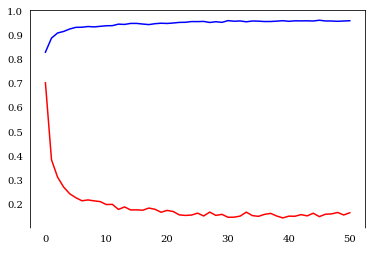

In [14]:
val_acc = hist.history['val_acc']
val_los = hist.history['val_loss']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('epochs')
ax.plot(range(len(val_acc)), val_acc, label='acc', color='blue')
ax.plot(range(len(val_los)), val_los, label='los', color='red')
# plt.plot(range(epochs), val_acc, label='acc', color='black')
ax.xaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='both', color='white')
plt.show()